In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
import numpy as np

In [3]:
# Obteniendo Región, Tipo de delito y número de delitos, hoja comauto y resumen por Región
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  

    data = []
    actual_region_tipo = None
    encontrado_region_tipo = False 

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents a delito type. 

        if not encontrado_region_tipo or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            actual_region_tipo = cell_a_value
            encontrado_region_tipo = True  
            continue 
        
        # After a delito type, the next rows are age  until the next delito type.

        if cell_a_value and encontrado_region_tipo:
            sexo = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([actual_region_tipo, sexo, año, value])
            continue
        
        # Reset the flag if this row is empty 
        if cell_a_value == None:
            encontrado_region_tipo = False

    df = pd.DataFrame(data, columns=['Region', 'tipo_de_delito', 'año', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'control sheet.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path,'comauto')
df.columns = df.columns.str.replace(' ', '_', regex=False)

df['Region'] = df['Region'].str.strip()
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df = df[df['Region'] != 'Nacional']
df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()
df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()


df_region_delito = df
df_grouped_region = df_region_delito.groupby(['Region', 'año'])['Value'].sum().reset_index(name='total_region_delito')
df_grouped_region

Region   año  total_region_delito
0    Andalucía  2013               109762
1    Andalucía  2014               107072
2    Andalucía  2015               111996
3    Andalucía  2016               141386
4    Andalucía  2017               152194
..         ...   ...                  ...
185  Rioja, La  2018                 5468
186  Rioja, La  2019                 4878
187  Rioja, La  2020                 3822
188  Rioja, La  2021                 5942
189  Rioja, La  2022                 6190

[190 rows x 3 columns]

In [4]:
# Obteniendo la población total de la hoja 'poblacion' y fusionándola con el resultado anterior"
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  

    data = []
    género = None
    género_tipo = False 

    for row in range(9, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents genero 

        if not género_tipo or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            género = cell_a_value
            género_tipo = True  
            continue 
        

        if cell_a_value and género_tipo:
            Region = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=8, column=col).value 
                edad = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([género,Region, edad, año, value])
            continue
        
        # Reset the flag if this row is empty and we're between delito types
        if cell_a_value == None:
            género_tipo = False

    df = pd.DataFrame(data, columns=['género','Region', 'edad', 'año', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'control sheet.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path,'poblacion')
df.columns = df.columns.str.replace(' ', '_', regex=False)
#df = df[df['Region'] != 'Total Nacional']
df['Region'] = df['Region'].str.strip()
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['género'] = df['género'].str.strip()
#df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
#df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()

#df = df[df['tipo_de_delito'] != 'Total Delitos']

df_region_género_edad = df
df_grouped_region_pob = df_region_género_edad[df_region_género_edad['género'] == 'Ambos sexos']
df_grouped_region_pob = df_grouped_region_pob[df_grouped_region_pob['Region'] != 'TOTAL']
df_grouped_region_pob = df_grouped_region_pob[df_grouped_region_pob['Region'] != '']
df_grouped_region_pob['Value']   = df_grouped_region_pob['Value']  * 1000
df_grouped_region_pob = df_grouped_region_pob.groupby(['Region', 'año'])['Value'].sum().reset_index(name='total_region')
merged_grouped_region_pob = pd.merge(df_grouped_region, df_grouped_region_pob, on=['Region','año'])
merged_grouped_region_pob['perc_delito'] = ( merged_grouped_region_pob['total_region_delito']/merged_grouped_region_pob['total_region'] ) * 100
merged_grouped_region_pob


Region   año  total_region_delito total_region perc_delito
0    Andalucía  2013               109762    6856500.0    1.600846
1    Andalucía  2014               107072    6864900.0    1.559702
2    Andalucía  2015               111996    6879300.0    1.628014
3    Andalucía  2016               141386    6891100.0    2.051719
4    Andalucía  2017               152194    5515900.0    2.759187
..         ...   ...                  ...          ...         ...
185  Rioja, La  2018                 5468     260500.0     2.09904
186  Rioja, La  2019                 4878     262500.0    1.858286
187  Rioja, La  2020                 3822     264600.0    1.444444
188  Rioja, La  2021                 5942     264300.0    2.248203
189  Rioja, La  2022                 6190     264800.0    2.337613

[190 rows x 5 columns]

In [5]:
# Obteniendo la pobreza total de la hoja 'pobreza' y fusionándola con el resultado anterior"
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  

    data = []

    for row in range(9, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # the new cell represents region

        if cell_a_value:
            Region = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=8, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([Region, año, value])
            continue
        
        # Reset the flag if this row is empty and we're between delito types


    df = pd.DataFrame(data, columns=['Region',  'año', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'control sheet.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path,'pobreza')
df.columns = df.columns.str.replace(' ', '_', regex=False)

df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df = df[df['Region'] != 'Nacional']
#df['género'] = df['género'].str.strip()
#df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
#df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()

#df = df[df['tipo_de_delito'] != 'Total Delitos']

df_region_pobreza = df
df_grouped_pobreza_pob = df_region_pobreza.groupby(['Region', 'año'])['Value'].sum().reset_index(name='total_region_pobreza')
merged_grouped_region_probeza = pd.merge(merged_grouped_region_pob, df_grouped_pobreza_pob, on=['Region','año'])
merged_grouped_region_probeza

Region   año  total_region_delito total_region perc_delito  \
0    Andalucía  2013               109762    6856500.0    1.600846   
1    Andalucía  2014               107072    6864900.0    1.559702   
2    Andalucía  2015               111996    6879300.0    1.628014   
3    Andalucía  2016               141386    6891100.0    2.051719   
4    Andalucía  2017               152194    5515900.0    2.759187   
..         ...   ...                  ...          ...         ...   
185  Rioja, La  2018                 5468     260500.0     2.09904   
186  Rioja, La  2019                 4878     262500.0    1.858286   
187  Rioja, La  2020                 3822     264600.0    1.444444   
188  Rioja, La  2021                 5942     264300.0    2.248203   
189  Rioja, La  2022                 6190     264800.0    2.337613   

     total_region_pobreza  
0                    29.1  
1                    33.3  
2                    35.7  
3                    35.4  
4                    31.0  
..                    ...  
185                  16.6  
186                  12.3  
187                  15.0  
188                  16.1  
189                  16.6  

[190 rows x 6 columns]

In [6]:
# Obteniendo la estudios total de la hoja 'estudios' y fusionándola con el resultado anterior"
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  

    data = []
    género = None
    género_tipo = False 

    for row in range(9, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents genero

        if not género_tipo or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            género = cell_a_value
            género_tipo = True  
            continue 
        
        # After a genero type, the next rows are region  until the next genero type.

        if cell_a_value and género_tipo:
            Region = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=8, column=col).value[:-2] 
                estudios = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([género,Region, estudios, año, value])
            continue
        
        # Reset the flag if this row is empty and we're between delito types
        if cell_a_value == None:
            género_tipo = False

    df = pd.DataFrame(data, columns=['género','Region', 'estudios', 'año', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'control sheet.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path,'estudios')
df.columns = df.columns.str.replace(' ', '_', regex=False)
#df = df[df['Region'] != 'Total Nacional']
df['Region'] = df['Region'].str.strip()
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['género'] = df['género'].str.strip()
#df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
#df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()

#df = df[df['tipo_de_delito'] != 'Total Delitos']

df_género_region_estudios = df
df_grouped_region_estudios = df_género_region_estudios[df_género_region_estudios['género'] == 'Ambos sexos both sex']
df_grouped_region_estudios = df_grouped_region_estudios[df_grouped_region_estudios['Region'] != 'Nacional']
df_grouped_region_estudios = df_grouped_region_estudios[df_grouped_region_estudios['Region'] != '']
df_grouped_region_estudios['Value']   = df_grouped_region_estudios['Value'] 
df_grouped_region_estudios = df_grouped_region_estudios.groupby(['género','Region','estudios', 'año'])['Value'].mean().reset_index(name='total_region_estudios')
df_grouped_region_estudios = df_grouped_region_estudios.groupby(['Region','estudios', 'año'])['total_region_estudios'].sum().reset_index(name='total_region_estudios_fin')


df_grouped_region_estudios = df_grouped_region_estudios.pivot(index=['Region','año'], columns='estudios', values='total_region_estudios_fin')
df_grouped_region_estudios.columns = [''.join(col).strip() for col in df_grouped_region_estudios.columns.values]

df_grouped_region_estudios.reset_index(inplace=True)
merged_grouped_region_estudios_temp = pd.merge(merged_grouped_region_probeza, df_grouped_region_estudios, on=['Region','año'])

# backfilling step for year 2013 as this is missing , Using 204 as base
merged_grouped_region_estudios_2014 = merged_grouped_region_estudios_temp[merged_grouped_region_estudios_temp['año'] == '2014'].copy()
merged_grouped_region_estudios_2014['año'] = '2013'
merged_grouped_region_estudios = pd.concat([merged_grouped_region_estudios_temp, merged_grouped_region_estudios_2014], ignore_index=True)
merged_grouped_region_estudios.sort_values(by='año', inplace=True)
merged_grouped_region_estudios


Region   año  total_region_delito total_region  \
189                    Rioja, La  2013                 3780     259900.0   
188                   País Vasco  2013                21076    1813900.0   
171                    Andalucía  2013               107072    6864900.0   
173      Asturias, Principado de  2013                12392     920400.0   
174               Balears, Illes  2013                18352     930100.0   
..                           ...   ...                  ...          ...   
53                     Cantabria  2022                11060     500800.0   
161                   País Vasco  2022                42300    1838800.0   
152  Navarra, Comunidad Foral de  2022                11030     547000.0   
26       Asturias, Principado de  2022                17926     882400.0   
35                Balears, Illes  2022                25512    1037400.0   

    perc_delito  total_region_pobreza Analfabetos Educación primaria  \
189    1.454406                  16.2        0.65             19.575   
188    1.161916                  10.2       0.625              17.85   
171    1.559702                  33.3       3.775             14.625   
173    1.346371                  16.7        0.65               23.0   
174    1.973121                  17.9        1.85              11.75   
..          ...                   ...         ...                ...   
53     2.208466                  14.8       0.325              8.475   
161    2.300413                  12.2        0.35              10.45   
152    2.016453                  10.9       0.825             12.375   
26     2.031505                  20.1         0.7              8.925   
35     2.459225                  16.9         1.2             10.375   

    Educación superior Escuela Profesional Escuela Secundaria  \
189             28.825               8.525              26.05   
188             36.425               9.125             22.975   
171             21.775                7.25             31.125   
173             29.575                7.05             22.575   
174             22.775               6.875              34.35   
..                 ...                 ...                ...   
53               35.35               10.35              31.45   
161             44.325               9.575              20.95   
152               37.7                10.7             23.275   
26              33.325               9.175             31.875   
35                27.5               8.775             30.875   

    Estudios primarios incompletos Licenciado  
189                           3.55      12.85  
188                           2.35     10.625  
171                           9.85      11.65  
173                          4.875     12.275  
174                          6.925      15.45  
..                             ...        ...  
53                           0.825     13.225  
161                          2.125       12.3  
152                            2.2     12.925  
26                           2.425     13.575  
35                           3.325     17.975  

[190 rows x 13 columns]

In [7]:
# Obteniendo la genero total de la hoja 'genero' y fusionándola con el resultado anterior"
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  # Assumes the data is in the first sheet

    data = []
    region = None
    region_tipo = False 

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detect if the row represents a region type. 

        if not region_tipo or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            region = cell_a_value
            region_tipo = True  
            continue 
        
        # After a region type, the next rows are género  until the next region type.

        if cell_a_value and region_tipo:
            género = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([region,género,  año, value])
            continue
        
        # Reset the flag if this row is empty 
        if cell_a_value == None:
            region_tipo = False

    df = pd.DataFrame(data, columns=['Region','género',  'año', 'Value'])
    return df
# Path to the Excel file you've uploaded
file_path = r'control sheet.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path,'genero')
df.columns = df.columns.str.replace(' ', '_', regex=False)
#df = df[df['Region'] != 'Total Nacional']
df['Region'] = df['Region'].str.strip()
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['género'] = df['género'].str.strip()
df = df[df['Region'] != 'Nacional']
#df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
#df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()

#df = df[df['tipo_de_delito'] != 'Total Delitos']

df_region_género = df
df_grouped_region_género_perc = df_region_género.pivot(index=['Region','año'], columns='género', values='Value')
df_grouped_region_género_perc.columns = [''.join(col).strip() for col in df_grouped_region_género_perc.columns.values]
df_grouped_region_género_perc.reset_index(inplace=True)
df_grouped_region_género_perc['hombres_ratio'] = df_grouped_region_género_perc['Hombres']/df_grouped_region_género_perc['Total']
df_grouped_region_género_perc['mujeres_ratio'] = df_grouped_region_género_perc['Mujeres']/df_grouped_region_género_perc['Total']
merged_grouped_region_género_perc = pd.merge(merged_grouped_region_estudios, df_grouped_region_género_perc, on=['Region','año'])
merged_grouped_region_género_perc['perc_hombres'] = ( merged_grouped_region_género_perc['hombres_ratio']* 100 ).round(2)
merged_grouped_region_género_perc['perc_mujeres'] = ( merged_grouped_region_género_perc['mujeres_ratio']* 100 ).round(2)

merged_grouped_region_género_perc

Region   año  total_region_delito total_region  \
0                      Rioja, La  2013                 3780     259900.0   
1                     País Vasco  2013                21076    1813900.0   
2                      Andalucía  2013               107072    6864900.0   
3        Asturias, Principado de  2013                12392     920400.0   
4                 Balears, Illes  2013                18352     930100.0   
..                           ...   ...                  ...          ...   
185                    Cantabria  2022                11060     500800.0   
186                   País Vasco  2022                42300    1838800.0   
187  Navarra, Comunidad Foral de  2022                11030     547000.0   
188      Asturias, Principado de  2022                17926     882400.0   
189               Balears, Illes  2022                25512    1037400.0   

    perc_delito  total_region_pobreza Analfabetos Educación primaria  \
0      1.454406                  16.2        0.65             19.575   
1      1.161916                  10.2       0.625              17.85   
2      1.559702                  33.3       3.775             14.625   
3      1.346371                  16.7        0.65               23.0   
4      1.973121                  17.9        1.85              11.75   
..          ...                   ...         ...                ...   
185    2.208466                  14.8       0.325              8.475   
186    2.300413                  12.2        0.35              10.45   
187    2.016453                  10.9       0.825             12.375   
188    2.031505                  20.1         0.7              8.925   
189    2.459225                  16.9         1.2             10.375   

    Educación superior Escuela Profesional Escuela Secundaria  \
0               28.825               8.525              26.05   
1               36.425               9.125             22.975   
2               21.775                7.25             31.125   
3               29.575                7.05             22.575   
4               22.775               6.875              34.35   
..                 ...                 ...                ...   
185              35.35               10.35              31.45   
186             44.325               9.575              20.95   
187               37.7                10.7             23.275   
188             33.325               9.175             31.875   
189               27.5               8.775             30.875   

    Estudios primarios incompletos Licenciado  Hombres  Mujeres  Total  \
0                             3.55      12.85     1517      169   1686   
1                             2.35     10.625     9856     1113  10969   
2                             9.85      11.65    49060     5821  54881   
3                            4.875     12.275     5410      666   6076   
4                            6.925      15.45     7821     1097   8918   
..                             ...        ...      ...      ...    ...   
185                          0.825     13.225     4418     1112   5530   
186                          2.125       12.3    17346     3804  21150   
187                            2.2     12.925     4728      787   5515   
188                          2.425     13.575     7163     1800   8963   
189                          3.325     17.975    10436     2320  12756   

     hombres_ratio  mujeres_ratio  perc_hombres  perc_mujeres  
0         0.899763       0.100237         89.98         10.02  
1         0.898532       0.101468         89.85         10.15  
2         0.893934       0.106066         89.39         10.61  
3         0.890388       0.109612         89.04         10.96  
4         0.876990       0.123010         87.70         12.30  
..             ...            ...           ...           ...  
185       0.798915       0.201085         79.89         20.11  
186       0.820142       0.179858         82.01         17.99  
18

In [9]:
#final result set creation and exporting to excel
merged_grouped_region_género_perc.columns = merged_grouped_region_género_perc.columns.str.replace(' ', '_', regex=False)
final_df = merged_grouped_region_género_perc[['Region','año','perc_delito','perc_hombres','perc_mujeres','total_region_pobreza','Analfabetos',	'Educación_primaria',	'Educación_superior',	'Escuela_Profesional',	'Escuela_Secundaria',	'Estudios_primarios_incompletos',	'Licenciado'	]]
final_df.rename(columns={'total_region_pobreza': 'perc_pobreza'}, inplace=True)
columns_to_convert = ['perc_delito','perc_hombres','perc_mujeres','perc_pobreza','Analfabetos',	'Educación_primaria',	'Educación_superior',	'Escuela_Profesional',	'Escuela_Secundaria',	'Estudios_primarios_incompletos',	'Licenciado']
for column in columns_to_convert:
    final_df[column] = pd.to_numeric(final_df[column], errors='coerce')
final_df[columns_to_convert] = final_df[columns_to_convert].round(2)
file_path = r'Complete dataset final.xlsx'
final_df.to_excel(file_path, index=False, engine='openpyxl')
final_df 

Region   año  perc_delito  perc_hombres  \
0                      Rioja, La  2013         1.45         89.98   
1                     País Vasco  2013         1.16         89.85   
2                      Andalucía  2013         1.56         89.39   
3        Asturias, Principado de  2013         1.35         89.04   
4                 Balears, Illes  2013         1.97         87.70   
..                           ...   ...          ...           ...   
185                    Cantabria  2022         2.21         79.89   
186                   País Vasco  2022         2.30         82.01   
187  Navarra, Comunidad Foral de  2022         2.02         85.73   
188      Asturias, Principado de  2022         2.03         79.92   
189               Balears, Illes  2022         2.46         81.81   

     perc_mujeres  perc_pobreza  Analfabetos  Educación_primaria  \
0           10.02          16.2         0.65               19.58   
1           10.15          10.2         0.62               17.85   
2           10.61          33.3         3.78               14.62   
3           10.96          16.7         0.65               23.00   
4           12.30          17.9         1.85               11.75   
..            ...           ...          ...                 ...   
185         20.11          14.8         0.32                8.48   
186         17.99          12.2         0.35               10.45   
187         14.27          10.9         0.82               12.37   
188         20.08          20.1         0.70                8.93   
189         18.19          16.9         1.20               10.38   

     Educación_superior  Escuela_Profesional  Escuela_Secundaria  \
0                 28.83                 8.52               26.05   
1                 36.42                 9.12               22.98   
2                 21.78                 7.25               31.12   
3                 29.58                 7.05               22.58   
4                 22.78                 6.88               34.35   
..                  ...                  ...                 ...   
185               35.35                10.35               31.45   
186               44.32                 9.58               20.95   
187               37.70                10.70               23.28   
188               33.33                 9.18               31.88   
189               27.50                 8.77               30.88   

     Estudios_primarios_incompletos  Licenciado  
0                              3.55       12.85  
1                              2.35       10.62  
2                              9.85       11.65  
3                              4.88       12.28  
4                              6.92       15.45  
..                              ...         ...  
185                            0.82       13.22  
186                            2.12       12.30  
187                            2.20       12.92  
188                            2.42       13.58  
189                            3.32       17.98  

[190 rows x 13 columns]

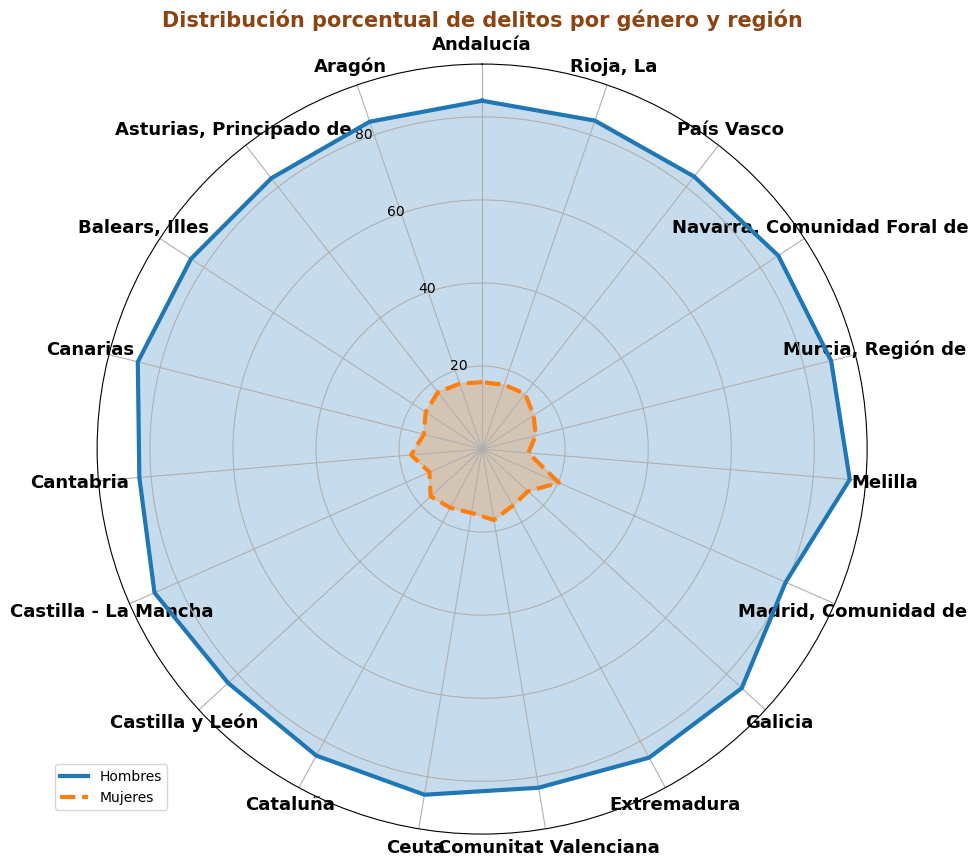

In [11]:
#plotting and analyzing genero statistics for region
from math import pi
df_filtered_summ = final_df
df_region_genero_stats = df_filtered_summ.groupby(['Region'])[['perc_hombres','perc_mujeres']].mean().reset_index()

# Variables setup
labels = df_region_genero_stats['Region'].unique()
num_vars = len(labels)

# Create angles for the chart
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Color and style options
colors = ['#1f77b4', '#ff7f0e']  
line_style = ['-', '--']  
gender_labels = ['Hombres', 'Mujeres'] 

# Plot each gender's data
for idx, gender in enumerate(['perc_hombres', 'perc_mujeres']):
    values = df_region_genero_stats.groupby('Region')[gender].mean().tolist()
    values += values[:1]
    ax.plot(angles, values, color=colors[idx], linewidth=3, linestyle=line_style[idx], label=gender_labels[idx])
    ax.fill(angles, values, color=colors[idx], alpha=0.25)

# Improve the aesthetics
ax.set_theta_offset(pi / 2) 
ax.set_xticks(angles[:-1])   
ax.set_xticklabels(labels, fontsize=13, fontweight='bold')  

# Add gridlines, labels, and legend
ax.grid(True)
ax.set_title('Distribución porcentual de delitos por género y región', size=15, color='saddlebrown', weight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

In [ ]:
#there is not so muchn variation and so result will have less impact based on genero

In [14]:
#plotting and analyzing poverty percentage by region
import plotly.express as px
df_region_pobreza_stats = df_filtered_summ.groupby(['Region'])[['perc_pobreza']].mean().reset_index()
df_region_pobreza_stats['perc_pobreza'] = df_region_pobreza_stats['perc_pobreza'].round(2)
size_scale = 30
df_region_pobreza_stats['normalized_size'] = (df_region_pobreza_stats['perc_pobreza'] - df_region_pobreza_stats['perc_pobreza'].min()) / (df_region_pobreza_stats['perc_pobreza'].max() - df_region_pobreza_stats['perc_pobreza'].min()) * size_scale + 5

# Using Plotly Express to create a bar chart
fig = px.bar(df_region_pobreza_stats, x='Region', y='perc_pobreza',
             text='perc_pobreza',  # Display percentage values on the bars
             color='perc_pobreza',  # Color the bars by poverty percentage
             color_continuous_scale='Plasma',  # Aesthetic choice for color scaling
             title='Visualización Interactiva de la Intensidad de la Pobreza por Región',
             labels={'perc_pobreza': 'Porcentaje de Pobreza', 'Region': 'Región'})

# Modify x-axis for better label visibility
fig.update_xaxes(tickangle=45)
fig.show()

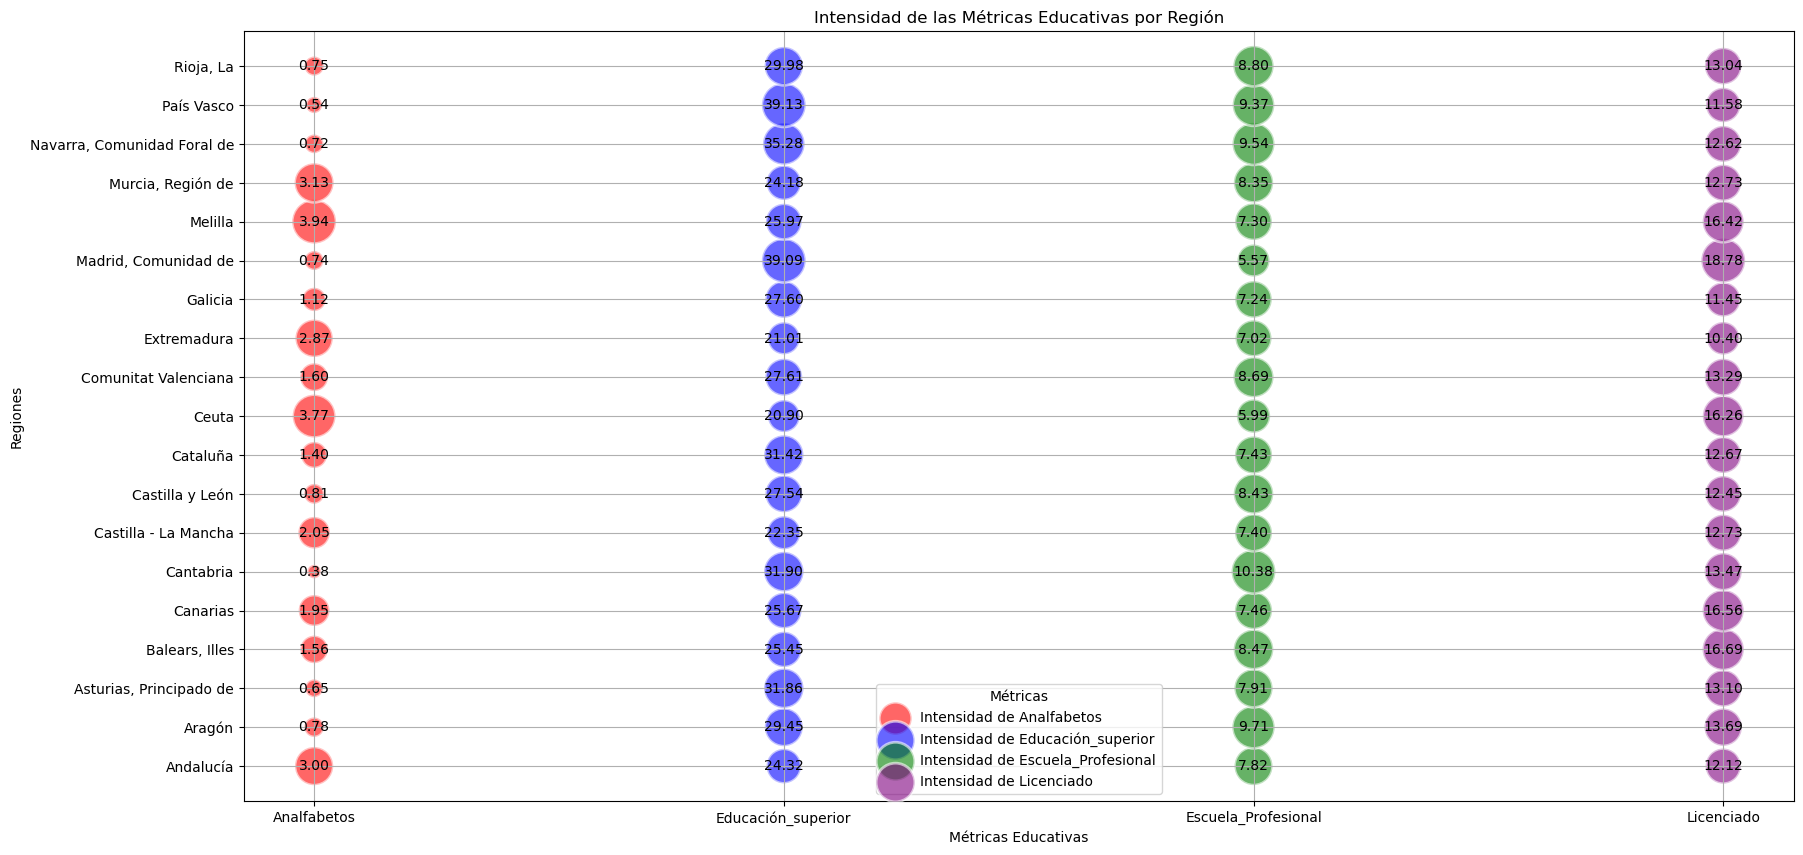

In [286]:
#plotting and analyzing estudios percentage by region
df_region_estudios_stats = df_filtered_summ.groupby(['Region'])[['Analfabetos', 'Educación_superior', 'Escuela_Profesional', 'Licenciado']].mean().reset_index()

# Preparing data for plotting
categories = ['Analfabetos', 'Educación_superior', 'Escuela_Profesional', 'Licenciado']
colors = ['red', 'blue', 'green', 'purple']  # Colors for each category
y_positions = np.arange(len(df_region_estudios_stats['Region']))  # Y positions for each region

# Creating the plot
plt.figure(figsize=(20, 10))  # Increased figure size for better readability
for i, category in enumerate(categories):
    normalized_sizes = df_region_estudios_stats[category.replace(' ', '_')] / df_region_estudios_stats[category.replace(' ', '_')].max() * 1000  # Normalize and scale sizes
    scatter = plt.scatter([category] * len(df_region_estudios_stats), y_positions, s=normalized_sizes,
                          color=colors[i], alpha=0.6, edgecolors='w', linewidth=2, label=f'Intensidad de {category}')
    for j, value in enumerate(df_region_estudios_stats[category.replace(' ', '_')]):
        plt.text(category, y_positions[j], f'{value:.2f}', color='black', ha='center', va='center')

plt.yticks(y_positions, df_region_estudios_stats['Region'])
plt.title('Intensidad de las Métricas Educativas por Región')
plt.xlabel('Métricas Educativas')
plt.ylabel('Regiones')
plt.legend(title="Métricas")
plt.grid(True)
plt.show()

In [ ]:
#Only Analfabetos shows good correlaltion based on scatter plot 

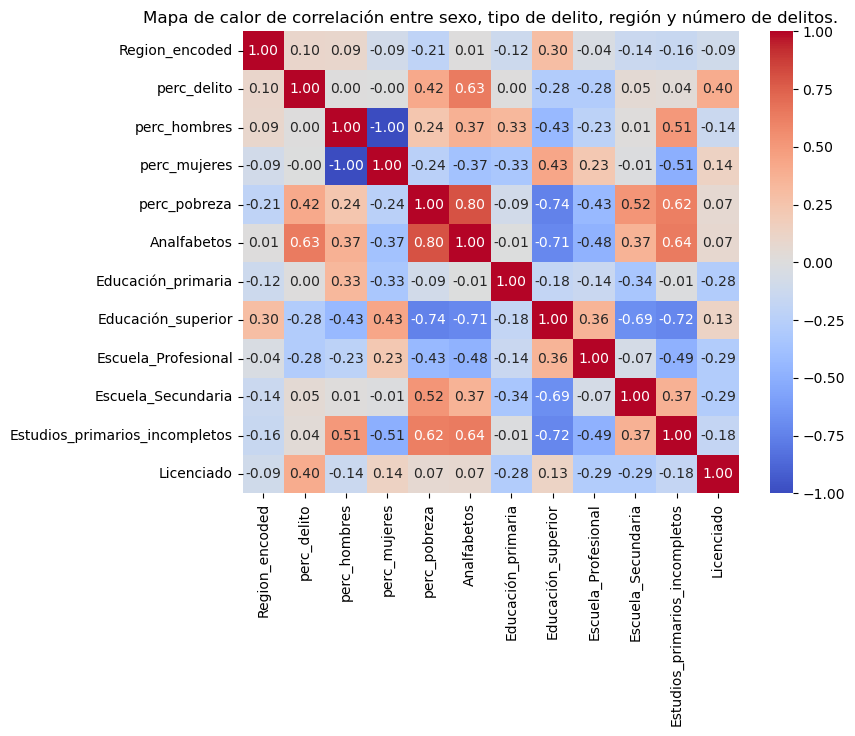

In [15]:
# Correlation plot between all variables to see the dependancy among features
import matplotlib.pyplot as plt
import seaborn as sns
df_filtered_summ = final_df
# Encoding 'tipo_de_delito' and 'sexo'

df_filtered_summ['Region_encoded'] = df_filtered_summ['Region'].astype('category').cat.codes

# Calculate correlations among encoded variables and 'Value'
corr = df_filtered_summ[['Region_encoded', 'perc_delito','perc_hombres', 'perc_mujeres','perc_pobreza','Analfabetos','Educación_primaria','Educación_superior','Escuela_Profesional','Escuela_Secundaria','Estudios_primarios_incompletos','Licenciado']]
corr = corr.corr()
# Plotting heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre sexo, tipo de delito, región y número de delitos.')
plt.show()

In [16]:
#porcentaje Delitos has strong positive and negative relationship based on education level.
#porcentaje Delitos and poverty porcentaje also has a good psoitive correlaltion
#porcentaje Delitos and genero also has little correlation and can be dropped
#Dropping fields with less correlation with porcentaje Delitos
df_filtered_summ = df_filtered_summ.drop('Escuela_Secundaria', axis=1)
df_filtered_summ = df_filtered_summ.drop('Estudios_primarios_incompletos', axis=1)
df_filtered_summ = df_filtered_summ.drop('Educación_primaria', axis=1)
df_filtered_summ = df_filtered_summ.drop('perc_hombres', axis=1)
df_filtered_summ = df_filtered_summ.drop('perc_mujeres', axis=1)


In [17]:
df_filtered_summ

Region   año  perc_delito  perc_pobreza  \
0                      Rioja, La  2013         1.45          16.2   
1                     País Vasco  2013         1.16          10.2   
2                      Andalucía  2013         1.56          33.3   
3        Asturias, Principado de  2013         1.35          16.7   
4                 Balears, Illes  2013         1.97          17.9   
..                           ...   ...          ...           ...   
185                    Cantabria  2022         2.21          14.8   
186                   País Vasco  2022         2.30          12.2   
187  Navarra, Comunidad Foral de  2022         2.02          10.9   
188      Asturias, Principado de  2022         2.03          20.1   
189               Balears, Illes  2022         2.46          16.9   

     Analfabetos  Educación_superior  Escuela_Profesional  Licenciado  \
0           0.65               28.83                 8.52       12.85   
1           0.62               36.42                 9.12       10.62   
2           3.78               21.78                 7.25       11.65   
3           0.65               29.58                 7.05       12.28   
4           1.85               22.78                 6.88       15.45   
..           ...                 ...                  ...         ...   
185         0.32               35.35                10.35       13.22   
186         0.35               44.32                 9.58       12.30   
187         0.82               37.70                10.70       12.92   
188         0.70               33.33                 9.18       13.58   
189         1.20               27.50                 8.77       17.98   

     Region_encoded  
0                18  
1                17  
2                 0  
3                 2  
4                 3  
..              ...  
185               5  
186              17  
187              16  
188               2  
189               3  

[190 rows x 9 columns]

In [18]:

df_summary = df_filtered_summ.groupby('año')['perc_delito'].sum().reset_index()
df_summary['año'] = pd.to_datetime(df_summary['año'].astype(str) + '-12-31')
df_summary.set_index('año', inplace=True)

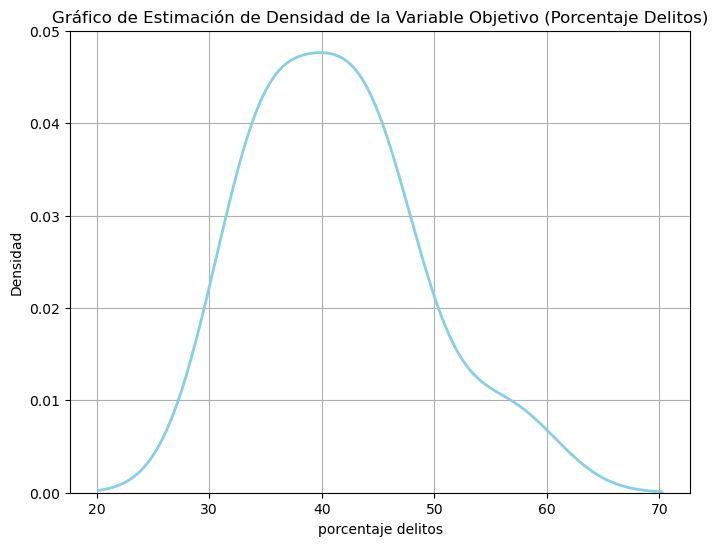

In [22]:

plt.figure(figsize=(8, 6))
sns.kdeplot(df_summary['perc_delito'], color='skyblue', linewidth=2)
plt.title('Gráfico de Estimación de Densidad de la Variable Objetivo (Porcentaje Delitos)')
plt.xlabel('porcentaje delitos')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

In [44]:
#analysis is that the  delitos porcentaje  alomost follows a normal distribution ( slight right skewdness))

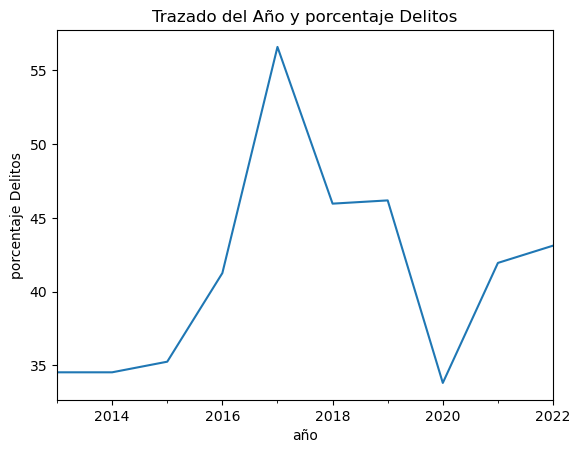

In [23]:
df_summary['perc_delito'].plot(title='Trazado del Año y porcentaje Delitos')
plt.ylabel('porcentaje Delitos')
plt.show()

In [46]:
#The drop in delitos in 2020 can be due to corona

In [47]:
#Forecast for the total percentage of delitos using ARIMA

In [24]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

result = adfuller(df_summary['perc_delito'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpret the p-value
if result[1] > 0.05:
    print('La serie no es estacionaria')
else:
    print('La serie es estacionaria')

ADF Statistic: -225.570254
p-value: 0.000000
La serie es estacionaria


In [25]:
from pmdarima.arima import auto_arima

model = auto_arima(df_summary['perc_delito'], start_p=0, start_q=0,
                   test='adf',       
                   max_p=3, max_q=3,
                   m=1,           
                   d=None,          
                   seasonal=False,  
                   start_P=0, 
                   D=0, 
                   trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=68.763, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=66.530, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=66.764, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=68.522, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=68.463, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=64.572, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=66.569, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=66.521, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.760 seconds


In [26]:
#Considering order of 0 ,2, 0 for order 

model = ARIMA(df_summary['perc_delito'], order=(1,2,0))
model_fit = model.fit()
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            perc_delito   No. Observations:                   10
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 -30.286
Date:                Sat, 20 Apr 2024   AIC                             64.572
Time:                        15:47:22   BIC                             64.731
Sample:                    12-31-2013   HQIC                            63.500
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6089      0.478     -1.275      0.202      -1.545       0.327
sigma2       107.3093     93.488      1.148      0.251     -75.923     290.542
Ljung-Box (L1) (Q):                   0.05   Jarque-

d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.

d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.

d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.



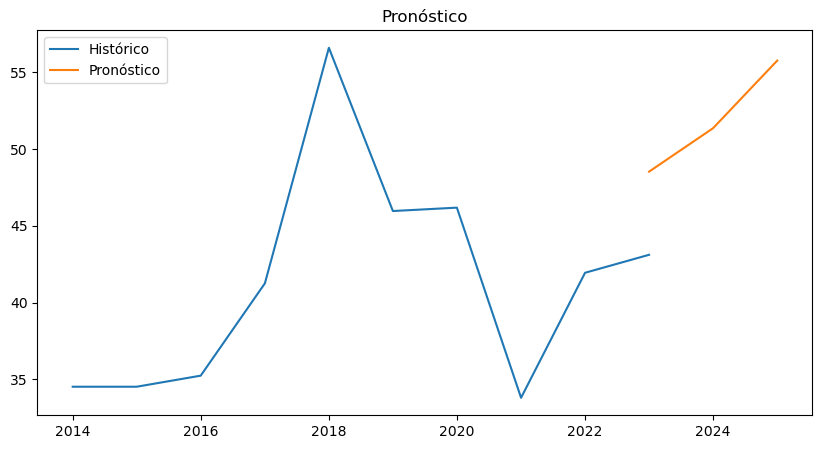

                Fecha  Pronóstico
2023-12-31 2022-12-31   48.523750
2024-12-31 2023-12-31   51.353653
2025-12-31 2024-12-31   55.756755


In [27]:
# Forecast the next 2 years

Pronóstico_dates = pd.date_range(df_summary.index[-1], periods=3, freq='A')

Pronóstico = model_fit.forecast(steps=len(Pronóstico_dates))

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df_summary.index, df_summary['perc_delito'], label='Histórico')
plt.plot(Pronóstico_dates, Pronóstico, label='Pronóstico')  
plt.title('Pronóstico')
plt.legend()
plt.show()

# Create a DataFrame for the forecast
Pronóstico_df = pd.DataFrame({
    'Fecha': Pronóstico_dates,
    'Pronóstico': Pronóstico
})

print(Pronóstico_df)

In [54]:
#Prediction of no of delitos considering age and type of delito as regressor

In [55]:
#First using Prophet
#!pip install prophet

In [28]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib  # for saving the encoder model

# Initialize the encoders
region_encoder = LabelEncoder()
df_filtered_summ = df_filtered_summ.drop(['Region_encoded'], axis=1, errors='ignore')
# Assuming your DataFrame 'df' has 'type_of_delito' and 'age' columns
df_filtered_summ['region_encoded'] = region_encoder.fit_transform(df_filtered_summ['Region'])
df_filtered_summ

Region   año  perc_delito  perc_pobreza  \
0                      Rioja, La  2013         1.45          16.2   
1                     País Vasco  2013         1.16          10.2   
2                      Andalucía  2013         1.56          33.3   
3        Asturias, Principado de  2013         1.35          16.7   
4                 Balears, Illes  2013         1.97          17.9   
..                           ...   ...          ...           ...   
185                    Cantabria  2022         2.21          14.8   
186                   País Vasco  2022         2.30          12.2   
187  Navarra, Comunidad Foral de  2022         2.02          10.9   
188      Asturias, Principado de  2022         2.03          20.1   
189               Balears, Illes  2022         2.46          16.9   

     Analfabetos  Educación_superior  Escuela_Profesional  Licenciado  \
0           0.65               28.83                 8.52       12.85   
1           0.62               36.42                 9.12       10.62   
2           3.78               21.78                 7.25       11.65   
3           0.65               29.58                 7.05       12.28   
4           1.85               22.78                 6.88       15.45   
..           ...                 ...                  ...         ...   
185         0.32               35.35                10.35       13.22   
186         0.35               44.32                 9.58       12.30   
187         0.82               37.70                10.70       12.92   
188         0.70               33.33                 9.18       13.58   
189         1.20               27.50                 8.77       17.98   

     region_encoded  
0                18  
1                17  
2                 0  
3                 2  
4                 3  
..              ...  
185               5  
186              17  
187              16  
188               2  
189               3  

[190 rows x 9 columns]

In [29]:
# Save the encoders for future use
joblib.dump(region_encoder, 'region_encoder.joblib')

['region_encoder.joblib']

In [30]:
from prophet  import Prophet
import pandas as pd

# Prepare your DataFrame for Prophet
df_filtered_summ['ds'] = pd.to_datetime(df_filtered_summ['año'].astype(str) + '-12-31')
df_filtered_summ['y'] = df_filtered_summ['perc_delito']


In [31]:
df_filtered_summ

Region   año  perc_delito  perc_pobreza  \
0                      Rioja, La  2013         1.45          16.2   
1                     País Vasco  2013         1.16          10.2   
2                      Andalucía  2013         1.56          33.3   
3        Asturias, Principado de  2013         1.35          16.7   
4                 Balears, Illes  2013         1.97          17.9   
..                           ...   ...          ...           ...   
185                    Cantabria  2022         2.21          14.8   
186                   País Vasco  2022         2.30          12.2   
187  Navarra, Comunidad Foral de  2022         2.02          10.9   
188      Asturias, Principado de  2022         2.03          20.1   
189               Balears, Illes  2022         2.46          16.9   

     Analfabetos  Educación_superior  Escuela_Profesional  Licenciado  \
0           0.65               28.83                 8.52       12.85   
1           0.62               36.42                 9.12       10.62   
2           3.78               21.78                 7.25       11.65   
3           0.65               29.58                 7.05       12.28   
4           1.85               22.78                 6.88       15.45   
..           ...                 ...                  ...         ...   
185         0.32               35.35                10.35       13.22   
186         0.35               44.32                 9.58       12.30   
187         0.82               37.70                10.70       12.92   
188         0.70               33.33                 9.18       13.58   
189         1.20               27.50                 8.77       17.98   

     region_encoded         ds     y  
0                18 2013-12-31  1.45  
1                17 2013-12-31  1.16  
2                 0 2013-12-31  1.56  
3                 2 2013-12-31  1.35  
4                 3 2013-12-31  1.97  
..              ...        ...   ...  
185               5 2022-12-31  2.21  
186              17 2022-12-31  2.30  
187              16 2022-12-31  2.02  
188               2 2022-12-31  2.03  
189               3 2022-12-31  2.46  

[190 rows x 11 columns]

In [56]:
    # Initialize and fit the Prophet model with additional regressors
								
model = Prophet(yearly_seasonality=False,changepoint_prior_scale=0.40)
model.add_regressor('perc_pobreza', prior_scale=100)
model.add_regressor('Analfabetos', prior_scale=100)
model.add_regressor('Educación_superior', prior_scale=50)
model.add_regressor('Escuela_Profesional', prior_scale=50)
model.add_regressor('Licenciado', prior_scale=100)
model.add_regressor('region_encoded', prior_scale=100)
model.fit(df_filtered_summ[['ds','region_encoded','perc_pobreza','Analfabetos','Educación_superior','Escuela_Profesional','Licenciado','y']], algorithm='LBFGS', iter=20000)

16:07:44 - cmdstanpy - INFO - Chain [1] start processing
16:07:44 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
#prediction paarmeters input and extar regression variables are using the last time series value
region_input = "Balears, Illes"
año_de_predicción = 2025
perc_pobreza_input = 16.9
Analfabetos_input = 1.20	
Educación_superior_input = 27.50
Escuela_Profesional_input = 8.77
Licenciado_input = 17.98

In [49]:
df_filtered_summ

Region   año  perc_delito  perc_pobreza  Analfabetos  \
2    Andalucía  2013         1.56          33.3         3.78   
34   Andalucía  2014         1.56          33.3         3.78   
51   Andalucía  2015         1.63          35.7         3.53   
66   Andalucía  2016         2.05          35.4         3.20   
86   Andalucía  2017         2.76          31.0         3.10   
..         ...   ...          ...           ...          ...   
98   Rioja, La  2018         2.10          16.6         0.72   
119  Rioja, La  2019         1.86          12.3         0.52   
145  Rioja, La  2020         1.44          15.0         0.50   
153  Rioja, La  2021         2.25          16.1         0.95   
181  Rioja, La  2022         2.34          16.6         1.20   

     Educación_superior  Escuela_Profesional  Licenciado  region_encoded  \
2                 21.78                 7.25       11.65               0   
34                21.78                 7.25       11.65               0   
51                22.45                 7.30       12.05               0   
66                23.18                 7.52       11.88               0   
86                23.55                 7.28       12.02               0   
..                  ...                  ...         ...             ...   
98                29.00                 8.72       13.10              18   
119               30.12                 8.48       13.20              18   
145               30.67                 9.12       13.15              18   
153               31.65                 9.55       13.23              18   
181               33.02                 9.82       13.77              18   

            ds     y  y_lag1  y_lag2  y_lag3  
2   2013-12-31  1.56    1.56    1.56    1.56  
34  2014-12-31  1.56    1.56    1.56    1.56  
51  2015-12-31  1.63    1.56    1.56    1.56  
66  2016-12-31  2.05    1.63    1.56    1.56  
86  2017-12-31  2.76    2.05    1.63    1.56  
..         ...   ...     ...     ...     ...  
98  2018-12-31  2.10    2.51    1.98    1.51  
119 2019-12-31  1.86    2.10    2.51    1.98  
145 2020-12-31  1.44    1.86    2.10    2.51  
153 2021-12-31  2.25    1.44    1.86    2.10  
181 2022-12-31  2.34    2.25    1.44    1.86  

[190 rows x 14 columns]

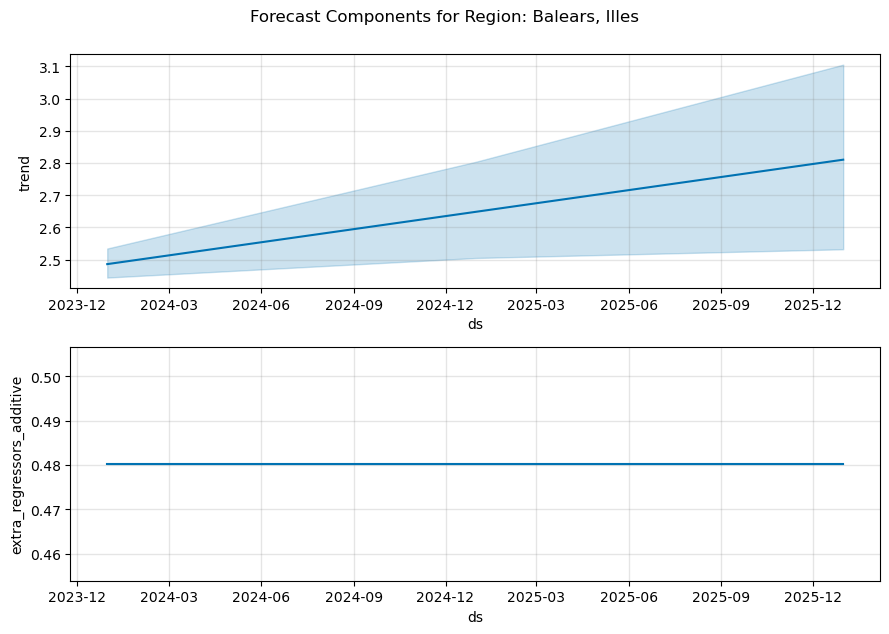

In [62]:

# Load the region encoder
loaded_region_encoder = joblib.load('region_encoder.joblib')

# Get unique regions from the DataFrame
unique_regions = df_filtered_summ['Region'].unique()

# Prepare future DataFrame for predictions
last_known_year = df_filtered_summ['ds'].dt.year.max()
future_years = list(range(last_known_year + 1, año_de_predicción + 1))
future_dates = pd.to_datetime([f"{year}-12-31" for year in future_years])

# Dictionary to hold predictions for each region
region_predictions = {}

for region in unique_regions:
    # Encode the current region
    input_region_encoded = loaded_region_encoder.transform([region])[0]
    
    # Get the last known values for the additional regressors
    last_values = df_filtered_summ[df_filtered_summ['Region'] == region].iloc[-1]
    
    # Prepare the future DataFrame for the current region
    future_df = pd.DataFrame({
        'ds': future_dates,
        'region_encoded': input_region_encoded,
        'perc_pobreza': last_values['perc_pobreza'],
        'Analfabetos': last_values['Analfabetos'],
        'Educación_superior': last_values['Educación_superior'],
        'Escuela_Profesional': last_values['Escuela_Profesional'],
        'Licenciado': last_values['Licenciado']
    })
    
    # Make predictions for the current region
    Pronóstico = model.predict(future_df)
    
    # Store or process the predictions
    region_predictions[region] = Pronóstico
    
    # Create a figure for the components of each region's forecast
    if region_input == region:  
        fig = model.plot_components(Pronóstico)
        fig.suptitle(f"Sample Forecast Components for Region: {region}", y=1.05)  # Adjust title spacing
        plt.show()

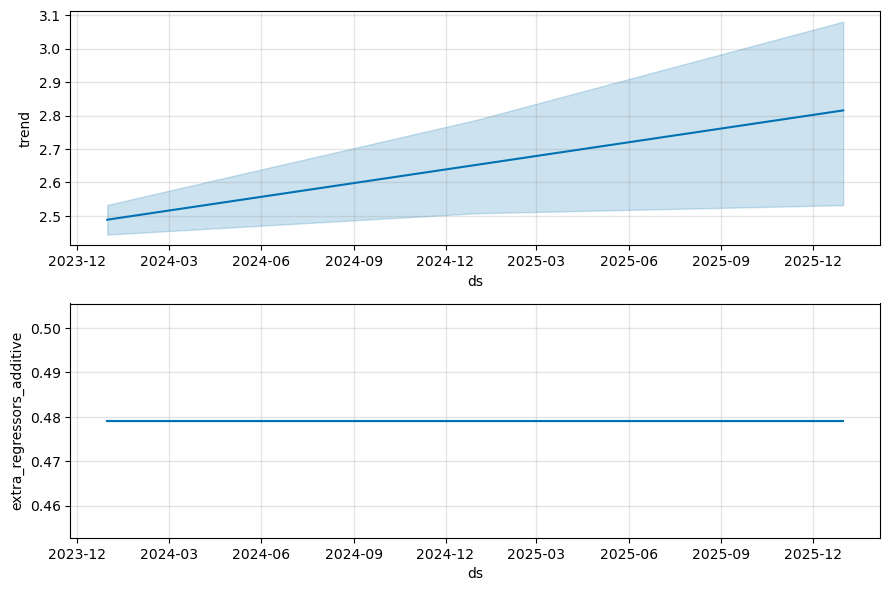

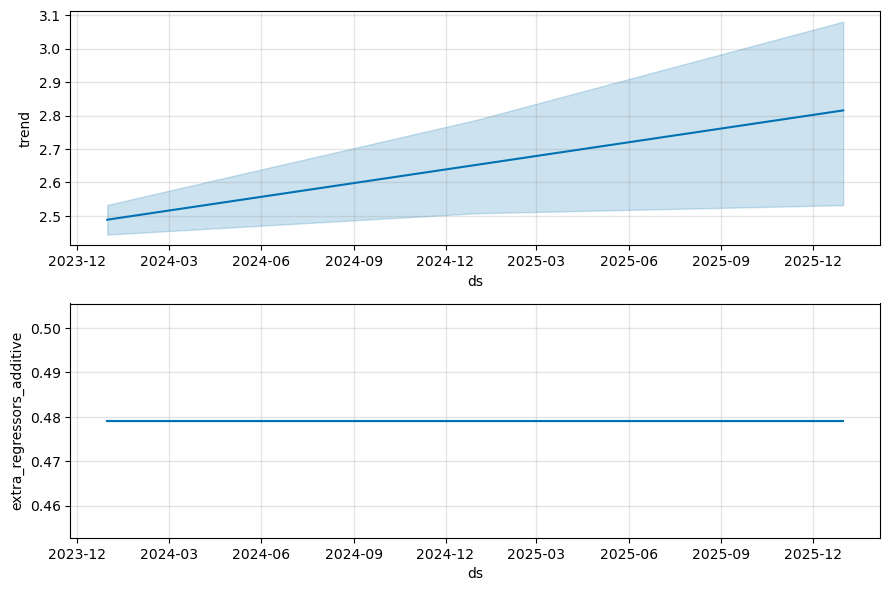

In [35]:
import matplotlib.pyplot as plt

# Load encoders
loaded_region_encoder = joblib.load('region_encoder.joblib')
# Encode input parameters
input_region_encoded = loaded_region_encoder.transform([region_input])[0]
# Prepare future DataFrame for Prophet
last_known_year = df_filtered_summ['ds'].dt.year.max()
future_years = list(range(last_known_year + 1, año_de_predicción + 1))
future_dates = pd.to_datetime([f"{year}-12-31" for year in future_years])
future_df = pd.DataFrame({'ds': future_dates})

future_df['region_encoded'] = input_region_encoded
future_df['perc_pobreza'] = perc_pobreza_input
future_df['Analfabetos'] = Analfabetos_input
future_df['Educación_superior'] = Educación_superior_input
future_df['Escuela_Profesional'] = Escuela_Profesional_input
future_df['Licenciado'] = Licenciado_input
Pronóstico = model.predict(future_df[['ds','region_encoded','perc_pobreza','Analfabetos','Educación_superior','Escuela_Profesional','Licenciado']])
model.plot_components(Pronóstico)


In [63]:
from prophet.diagnostics import cross_validation
cutoffs = pd.to_datetime(['2013-12-31', '2021-12-31'])
df_cv = cross_validation(model,horizon = '365 days',initial = '2920 days', period = '365 days')
df_cv.head() 

  0%|          | 0/1 [00:00<?, ?it/s]

16:13:28 - cmdstanpy - INFO - Chain [1] start processing
16:13:28 - cmdstanpy - INFO - Chain [1] done processing


ds      yhat  yhat_lower  yhat_upper     y     cutoff
0 2022-12-31  1.763152    0.827291    2.688614  2.30 2021-12-31
1 2022-12-31  2.887969    2.009989    3.774330  1.84 2021-12-31
2 2022-12-31  4.058199    3.174505    4.954845  2.23 2021-12-31
3 2022-12-31  2.970075    2.044683    3.842438  3.54 2021-12-31
4 2022-12-31  1.675846    0.711653    2.586123  2.46 2021-12-31

In [64]:
#METRICS ACCORDING TO THE HORIZON
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon       mse      rmse       mae      mape     mdape     smape  \
0 365 days  0.670416  0.818789  0.618468  0.271884  0.160996  0.243269   

   coverage  
0  0.684211

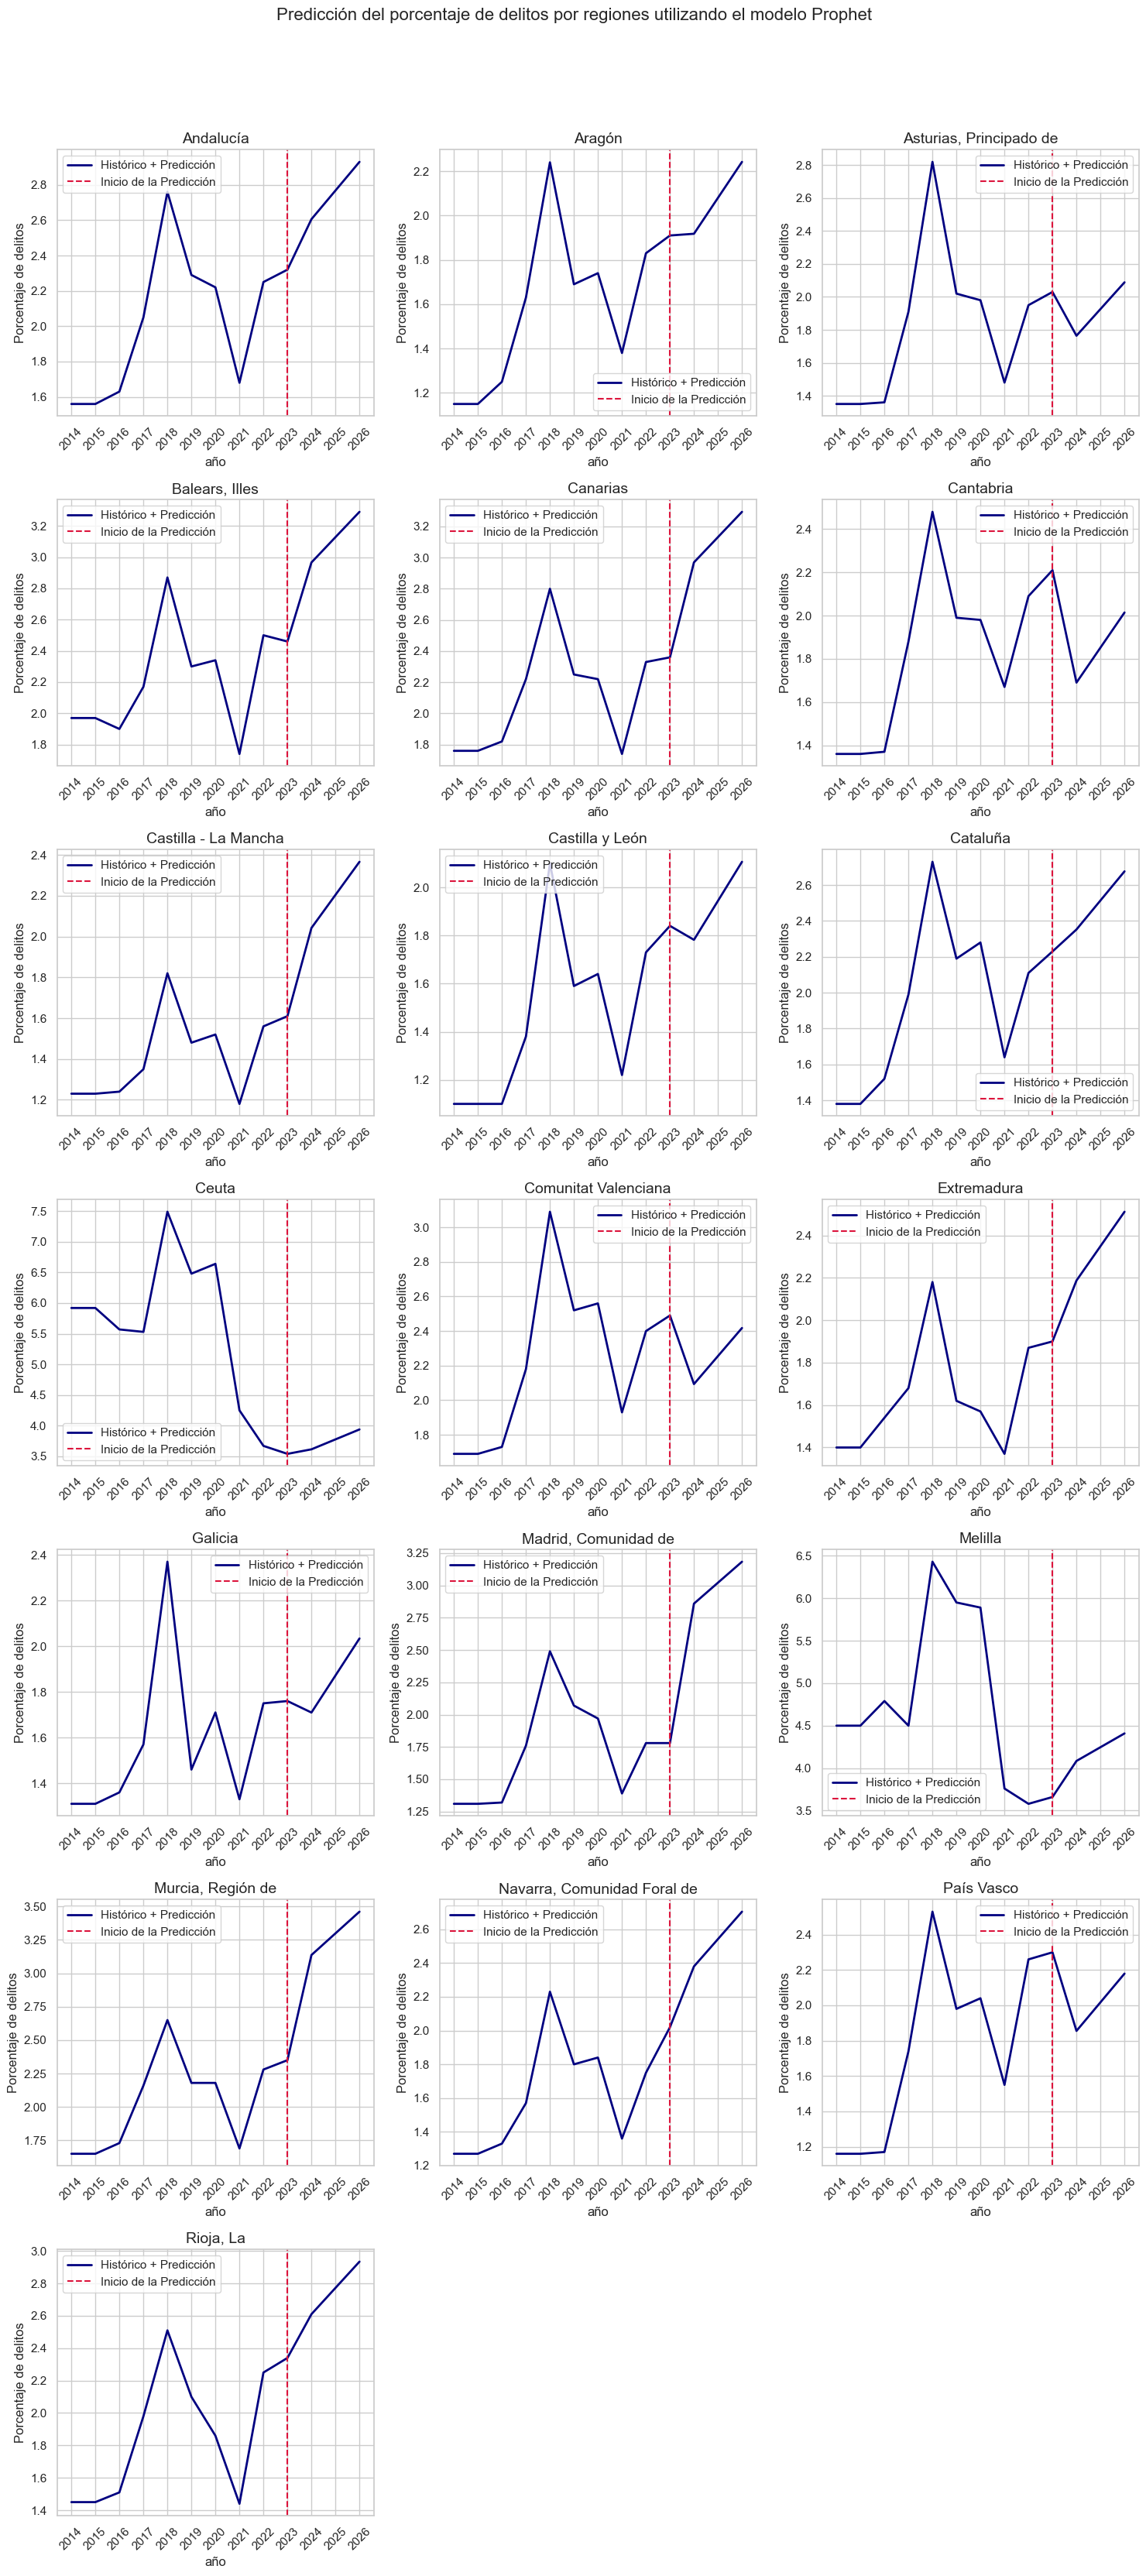

In [88]:

from math import ceil, sqrt
import matplotlib.dates as mdates
sns.set(style="whitegrid")

num_regions = len(region_predictions)
cols = 3  
rows = ceil(num_regions / cols)  

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
fig.subplots_adjust(hspace=0.6, wspace=0.4, top=.9)

axes = axes.flatten() if rows * cols > 1 else [axes]

for index, (region, Pronóstico) in enumerate(region_predictions.items()):
    # Filter historical data for the current region
    input_region_encoded = loaded_region_encoder.transform([region])[0]
    historical_data = df_filtered_summ[(df_filtered_summ['region_encoded'] == input_region_encoded)]

    # Prepare forecast data for plotting
    Pronóstico_data = Pronóstico[['ds', 'yhat']].rename(columns={'yhat': 'y'})
    
    # Combine historical and forecast data
    combined_data = pd.concat([historical_data, Pronóstico_data])
    combined_data = combined_data.sort_values(by='ds')


    ax = axes[index]
    ax.plot(combined_data['ds'], combined_data['y'], label='Histórico + Predicción', color='navy', linewidth=2)
    ax.axvline(x=pd.to_datetime('2023'), color='crimson', linestyle='--', label='Inicio de la Predicción')
    ax.set_xlabel('año')
    ax.set_ylabel('Porcentaje de delitos')
    ax.set_title(f'{region}', fontsize=14)
    ax.legend()

    # Set date formatting
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Explicitly enable the visibility of the x-axis labels for each subplot
    for label in ax.get_xticklabels():
        label.set_visible(True)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Hide any unused axes 
for i in range(index + 1, len(axes)):
    axes[i].set_visible(False)
fig.suptitle('Predicción del porcentaje de delitos por regiones utilizando el modelo Prophet', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [69]:
#RMSE score is low and model is showing good outcome .

In [89]:
#!pip install lightgbm
df_filtered_summ

Region   año  perc_delito  perc_pobreza  Analfabetos  \
2    Andalucía  2013         1.56          33.3         3.78   
34   Andalucía  2014         1.56          33.3         3.78   
51   Andalucía  2015         1.63          35.7         3.53   
66   Andalucía  2016         2.05          35.4         3.20   
86   Andalucía  2017         2.76          31.0         3.10   
..         ...   ...          ...           ...          ...   
98   Rioja, La  2018         2.10          16.6         0.72   
119  Rioja, La  2019         1.86          12.3         0.52   
145  Rioja, La  2020         1.44          15.0         0.50   
153  Rioja, La  2021         2.25          16.1         0.95   
181  Rioja, La  2022         2.34          16.6         1.20   

     Educación_superior  Escuela_Profesional  Licenciado  region_encoded  \
2                 21.78                 7.25       11.65               0   
34                21.78                 7.25       11.65               0   
51                22.45                 7.30       12.05               0   
66                23.18                 7.52       11.88               0   
86                23.55                 7.28       12.02               0   
..                  ...                  ...         ...             ...   
98                29.00                 8.72       13.10              18   
119               30.12                 8.48       13.20              18   
145               30.67                 9.12       13.15              18   
153               31.65                 9.55       13.23              18   
181               33.02                 9.82       13.77              18   

            ds     y  y_lag1  y_lag2  y_lag3  
2   2013-12-31  1.56    1.56    1.56    1.56  
34  2014-12-31  1.56    1.56    1.56    1.56  
51  2015-12-31  1.63    1.56    1.56    1.56  
66  2016-12-31  2.05    1.63    1.56    1.56  
86  2017-12-31  2.76    2.05    1.63    1.56  
..         ...   ...     ...     ...     ...  
98  2018-12-31  2.10    2.51    1.98    1.51  
119 2019-12-31  1.86    2.10    2.51    1.98  
145 2020-12-31  1.44    1.86    2.10    2.51  
153 2021-12-31  2.25    1.44    1.86    2.10  
181 2022-12-31  2.34    2.25    1.44    1.86  

[190 rows x 14 columns]

In [41]:
# In the next steps we will predict the percentage crime for all the regions based on LGBM regressor. Here we take the lags of the previous three time steps as part of every record so that we could create the dependancy


In [90]:
df_filtered_summ = df_filtered_summ.sort_values(by=[ 'region_encoded', 'ds'])
df_filtered_summ['y_lag1'] = df_filtered_summ.groupby([ 'region_encoded'])['y'].shift(1)
df_filtered_summ['y_lag2'] = df_filtered_summ.groupby([ 'region_encoded'])['y'].shift(2)
df_filtered_summ['y_lag3'] = df_filtered_summ.groupby([ 'region_encoded'])['y'].shift(3)
# Fill missing values in lagged columns with the first available 'y' value in each group
df_filtered_summ['y_lag1'] = df_filtered_summ.groupby([ 'region_encoded'])['y_lag1'].transform(lambda x: x.fillna(method='bfill'))
df_filtered_summ['y_lag2'] = df_filtered_summ.groupby([ 'region_encoded'])['y_lag2'].transform(lambda x: x.fillna(method='bfill'))
df_filtered_summ['y_lag3'] = df_filtered_summ.groupby([ 'region_encoded'])['y_lag3'].transform(lambda x: x.fillna(method='bfill'))

df_filtered_summ['y'] = df_filtered_summ['y'].astype(float)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


cutoff_date = df_filtered_summ['ds'].max() - pd.DateOffset(years=2)
# Split your dataset based on the cutoff date
train_df = df_filtered_summ[df_filtered_summ['ds'] <= cutoff_date][[ 'region_encoded','perc_pobreza','Analfabetos','Educación_superior','Escuela_Profesional','Licenciado', 'y_lag1', 'y_lag2', 'y_lag3','ds','y']]
test_df = df_filtered_summ[df_filtered_summ['ds'] > cutoff_date][[ 'region_encoded','perc_pobreza','Analfabetos','Educación_superior','Escuela_Profesional','Licenciado', 'y_lag1', 'y_lag2', 'y_lag3','ds','y']]
# Split the data into training and testing sets
X_train = train_df.drop(['ds', 'y'], axis=1)
y_train = train_df['y']
X_test = test_df.drop(['ds', 'y'], axis=1)
y_test = test_df['y']

In [106]:
X_train

region_encoded  perc_pobreza  Analfabetos  Educación_superior  \
2                 0          33.3         3.78               21.78   
34                0          33.3         3.78               21.78   
51                0          35.7         3.53               22.45   
66                0          35.4         3.20               23.18   
86                0          31.0         3.10               23.55   
..              ...           ...          ...                 ...   
67               18          11.9         0.75               28.72   
91               18           9.7         0.95               28.55   
98               18          16.6         0.72               29.00   
119              18          12.3         0.52               30.12   
145              18          15.0         0.50               30.67   

     Escuela_Profesional  Licenciado  y_lag1  y_lag2  y_lag3  
2                   7.25       11.65    1.56    1.56    1.56  
34                  7.25       11.65    1.56    1.56    1.56  
51                  7.30       12.05    1.56    1.56    1.56  
66                  7.52       11.88    1.63    1.56    1.56  
86                  7.28       12.02    2.05    1.63    1.56  
..                   ...         ...     ...     ...     ...  
67                  8.40       12.05    1.51    1.45    1.45  
91                  8.65       13.02    1.98    1.51    1.45  
98                  8.72       13.10    2.51    1.98    1.51  
119                 8.48       13.20    2.10    2.51    1.98  
145                 9.12       13.15    1.86    2.10    2.51  

[152 rows x 9 columns]

In [105]:
# Initialize and train the LightGBM model
from lightgbm import LGBMRegressor
model = LGBMRegressor(
    num_leaves=31,
    learning_rate=0.01,
    n_estimators=1000
)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='l2')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 152, number of used features: 9
[LightGBM] [Info] Start training from score 2.158289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMRegressor(learning_rate=0.01, n_estimators=1000)

In [93]:
import numpy as np
# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE de prueba: {rmse}')

RMSE de prueba: 0.8192326766661797


In [94]:

unique_regions = df_filtered_summ['Region'].unique()  
año_de_predicción = 2025
#dummy intialization for prediction storage frame
final_pred_df_lgbm = df_filtered_summ[df_filtered_summ['region_encoded'] == '111111111']
# Iterate over each unique combination
for region_input in unique_regions:
            # Encode input parameters for the current combination
    input_region_encoded = loaded_region_encoder.transform([region_input])[0]
            
            # Filter df_filtered_summ for the current combination
    specific_filter =   (df_filtered_summ['region_encoded'] == input_region_encoded)
    filtered_for_specific = df_filtered_summ[specific_filter]

    if not filtered_for_specific.empty:
        filtered_for_specific = filtered_for_specific.sort_values('ds')
        last_date = filtered_for_specific['ds'].max()
        last_year = last_date.year
        for year in range(last_year + 1, año_de_predicción + 1):
                    # Assuming your model needs at least 1 record to make a prediction
            if len(filtered_for_specific) >= 1:
                        # Prepare input data for prediction using the last available records
                most_recent_pobreza = filtered_for_specific['perc_pobreza'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Analfabetos = filtered_for_specific['Analfabetos'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Educación_superior = filtered_for_specific['Educación_superior'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Escuela_Profesional = filtered_for_specific['Escuela_Profesional'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Licenciado = filtered_for_specific['Licenciado'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_y = filtered_for_specific['y'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_y1 = filtered_for_specific['y'].iloc[-2] if len(filtered_for_specific) >= 2 else most_recent_y
                most_recent_y2 = filtered_for_specific['y'].iloc[-3] if len(filtered_for_specific) >= 3 else most_recent_y1
                predict_df = pd.DataFrame({
                            'region_encoded': [input_region_encoded],
                            'perc_pobreza': [most_recent_pobreza],
                            'Analfabetos' : most_recent_Analfabetos,
                            'Educación_superior' : most_recent_Educación_superior,
                            'Escuela_Profesional' : most_recent_Escuela_Profesional,
                             'Licenciado' : most_recent_Licenciado,
                             'y_lag1': [most_recent_y],
                            'y_lag2': [most_recent_y1],
                            'y_lag3': [most_recent_y2]
                        })

                        # Make the prediction
                predicted_y = model.predict(predict_df)[0]
                        # Create a new entry for the prediction
                new_date = pd.Timestamp(year, 12, 31)
                new_entry = {
                            'ds': new_date,
                            'y': predicted_y,
                            'perc_pobreza':  predict_df.iloc[0]['perc_pobreza'],
                            'Analfabetos':  predict_df.iloc[0]['Analfabetos'],
                            'Educación_superior':  predict_df.iloc[0]['Educación_superior'],
                            'Escuela_Profesional':  predict_df.iloc[0]['Escuela_Profesional'],
                            'Licenciado':  predict_df.iloc[0]['Licenciado'],
                            'region_encoded': input_region_encoded,
                            'Region': region_input,
                        }

                        # Append the new entry to filtered_for_specific for continuity
                new_entry_df = pd.DataFrame([new_entry])
                filtered_for_specific = pd.concat([filtered_for_specific, new_entry_df], ignore_index=True)
        final_pred_df_lgbm = pd.concat([final_pred_df_lgbm, filtered_for_specific], ignore_index=True)[['ds','Region','perc_pobreza','Analfabetos','Educación_superior','Escuela_Profesional','Licenciado','y','perc_delito']]
    else:
        print(f"No se encontraron datos históricos para la  Región: {region_input}.")

    

In [96]:
file_path = r'Predicción completa para LGBM reg con retrasos construidos (región).xlsx'
final_pred_df_lgbm.to_excel(file_path, index=False, engine='openpyxl')


In [97]:
# Dictionary to store the maximum forecasted delito value for each combination
max_pronosticados = {}

# Loop through each combination to fill the dictionary

for region in unique_regions:

    df_current = final_pred_df_lgbm[
                (final_pred_df_lgbm['Region'] == region) ]

    Datos_pronosticado = df_current[df_current['ds'] >= pd.to_datetime('2023-01-01')]
    if not Datos_pronosticado.empty:
        max_pronosticado = Datos_pronosticado['y'].max()
        max_pronosticados[( region)] = max_pronosticado

# Sort the dictionary by value and get the top 10 combinations
top_19_combinations = sorted(max_pronosticados, key=max_pronosticados.get, reverse=True)[:19]

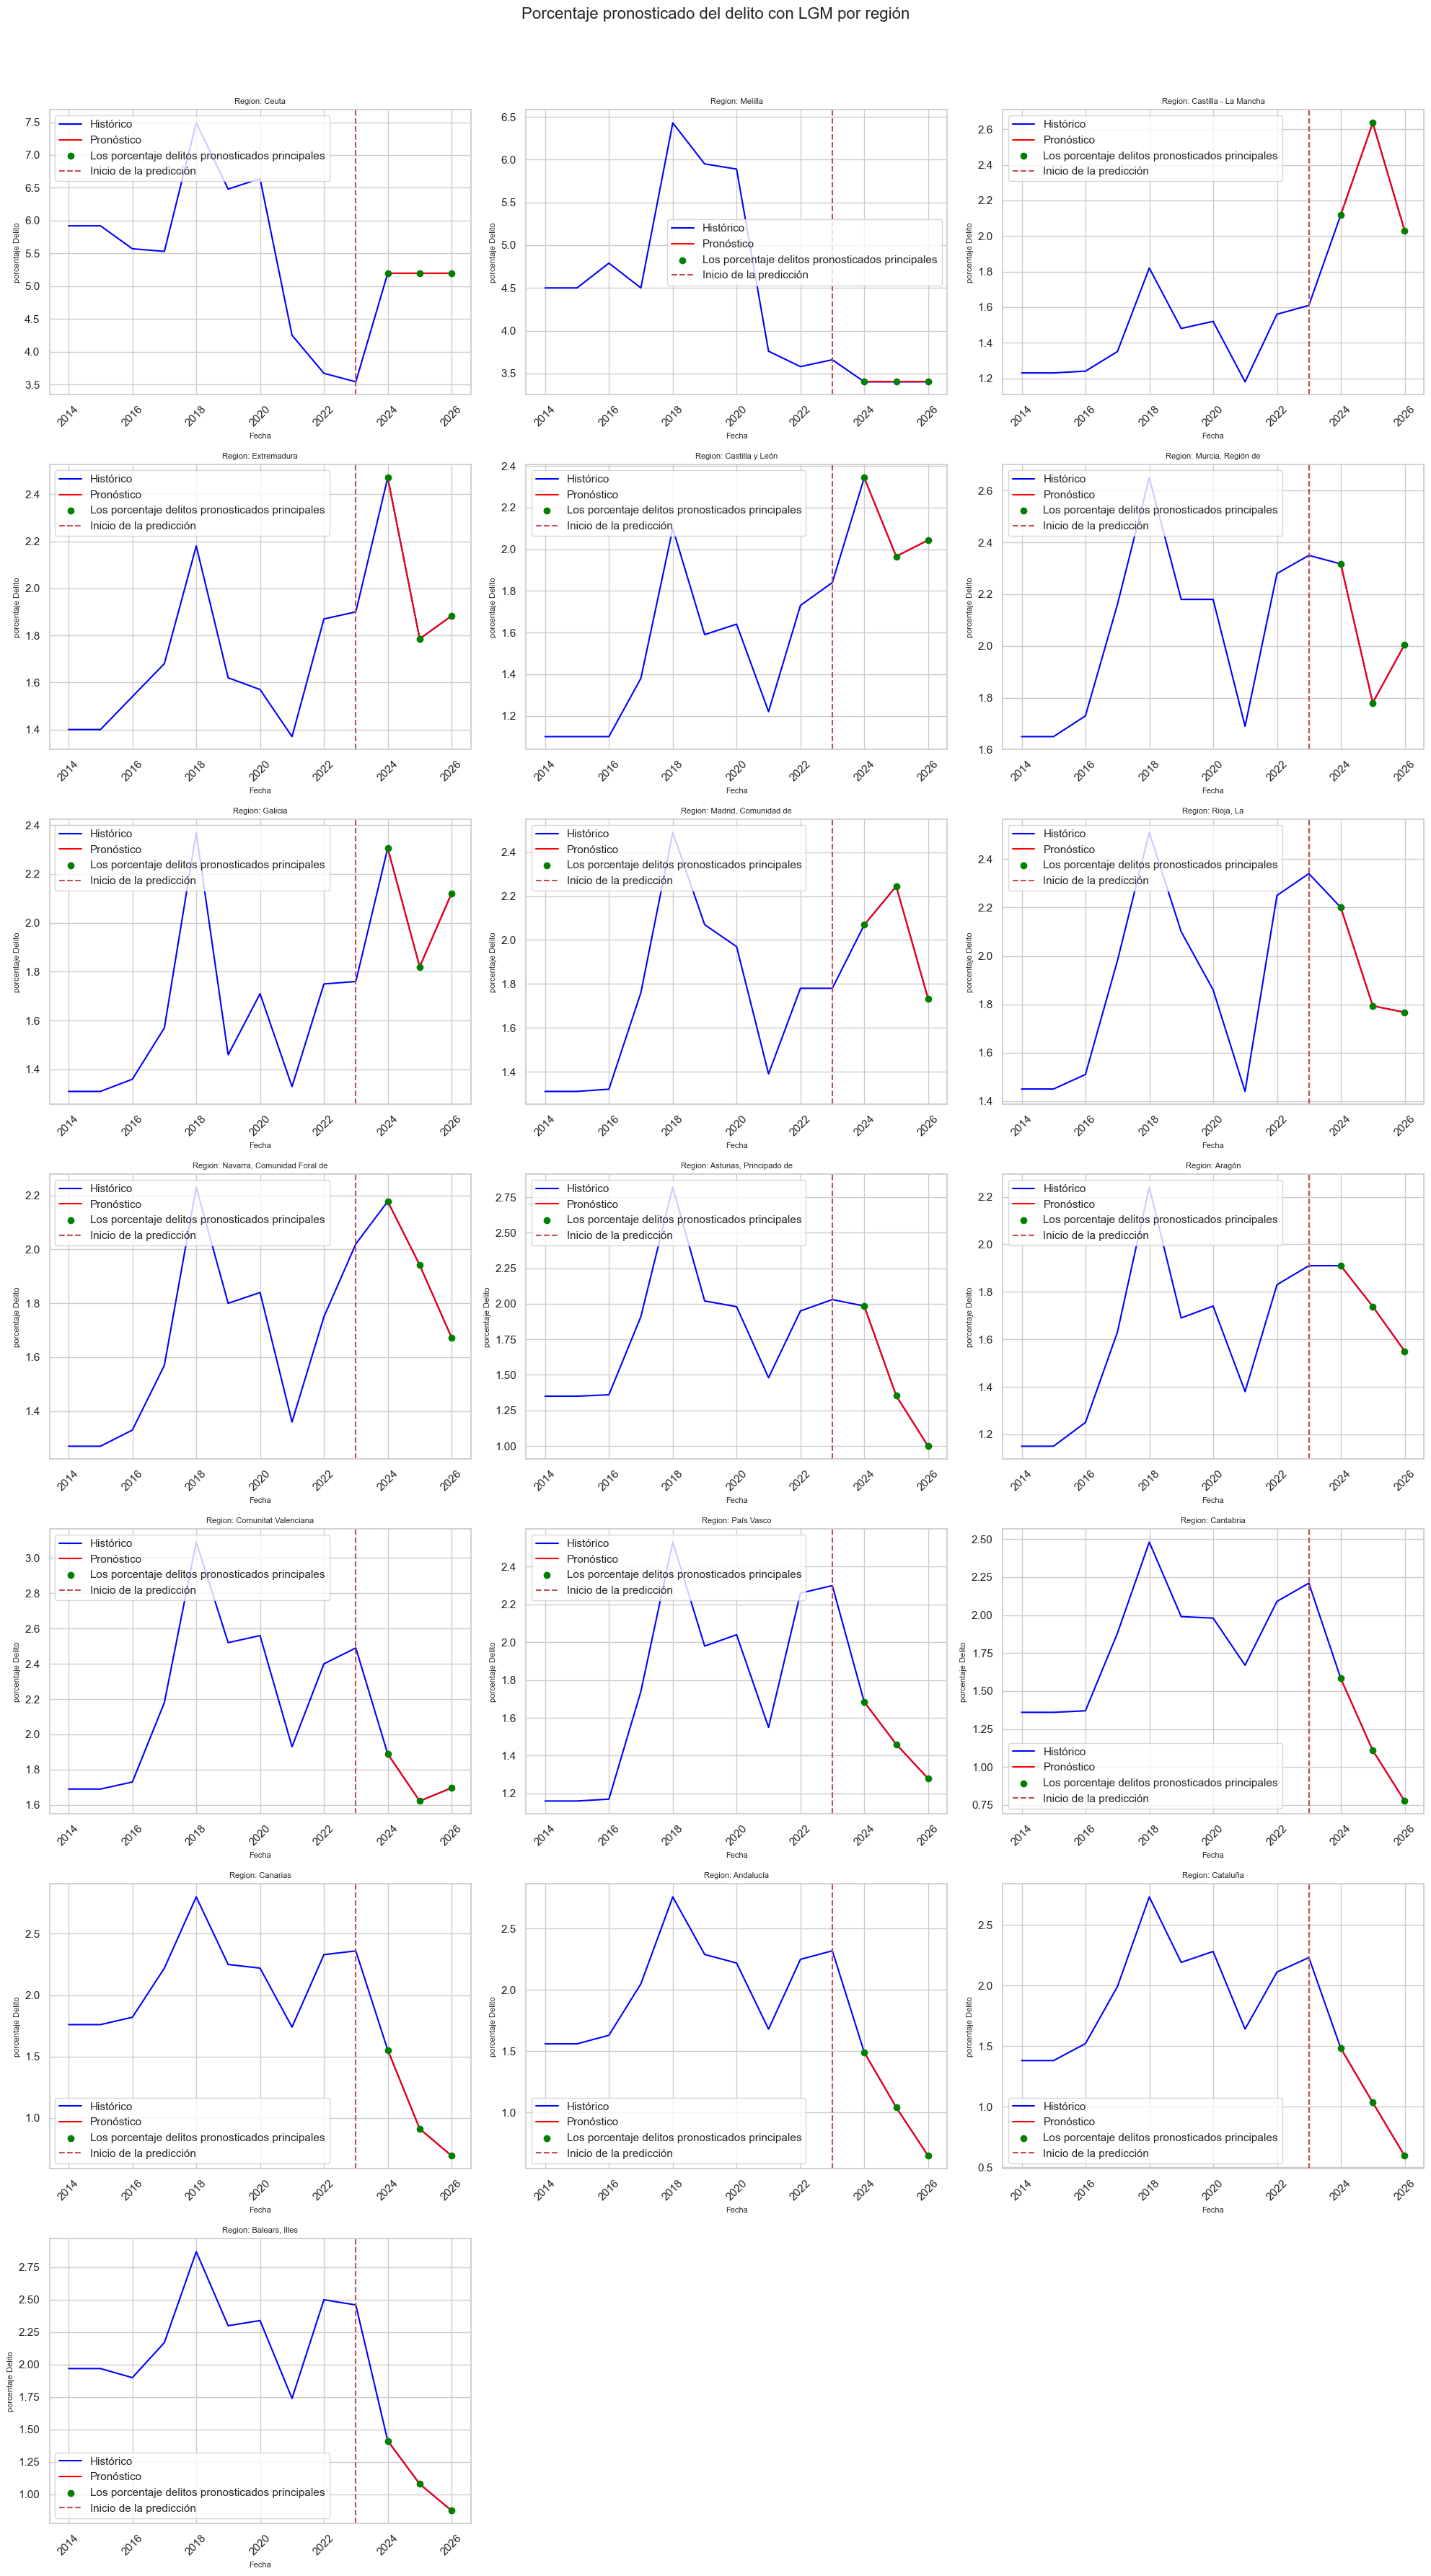

In [98]:
# Calculate grid dimensions
num_combinations = len(top_19_combinations)
num_rows = (num_combinations + 2) // 3  
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  
fig.suptitle('Porcentaje pronosticado del delito con LGM por región', fontsize=16, y=1.02)
axs = axs.flatten()
for i, combination in enumerate(top_19_combinations):
    region = combination
    df_current = final_pred_df_lgbm[ (final_pred_df_lgbm['Region'] == region)]
    latest_date = df_filtered_summ['ds'].max()
    historical_data = df_current
    Datos_pronosticado = df_current[df_current['ds'] > latest_date]
    

    axs[i].plot(historical_data['ds'], historical_data['y'], label='Histórico', color='blue')
    axs[i].plot(Datos_pronosticado['ds'], Datos_pronosticado['y'], label='Pronóstico', color='red')

    # Highlight top 10 forecasted values in this segment
    top_forecasted = Datos_pronosticado.nlargest(10, 'y')
    axs[i].scatter(top_forecasted['ds'], top_forecasted['y'], color='green', zorder=5, label='Los porcentaje delitos pronosticados principales')

    axs[i].set_title(f"Region: {region}", fontsize=8)
    axs[i].set_xlabel('Fecha', fontsize=8)
    axs[i].axvline(x=pd.to_datetime('2023-01-01'), color='r', linestyle='--', label='Inicio de la predicción')
    axs[i].set_ylabel('porcentaje Delito', fontsize=8)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()
# Turn off axes for any remaining subplots
for j in range(i + 1, num_rows * num_cols):
    axs[j].axis('off')
    
plt.tight_layout()
plt.show()

In [79]:
#Preidction using linear regerssion model considering three lags

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print("Error Cuadrático Medio Raíz de la Regresión Lineal:", rmse_linear)

Error Cuadrático Medio Raíz de la Regresión Lineal: 0.5207858746752576


In [100]:

unique_regions = df_filtered_summ['Region'].unique()  
año_de_predicción = 2025
#dummy intialization for prediction storage frame
final_pred_df_linreg = df_filtered_summ[df_filtered_summ['region_encoded'] == '111111111']
# Iterate over each unique combination
for region_input in unique_regions:
            # Encode input parameters for the current combination
    input_region_encoded = loaded_region_encoder.transform([region_input])[0]
            
            # Filter df_filtered_summ for the current combination
    specific_filter =   (df_filtered_summ['region_encoded'] == input_region_encoded)
    filtered_for_specific = df_filtered_summ[specific_filter]

    if not filtered_for_specific.empty:
        filtered_for_specific = filtered_for_specific.sort_values('ds')
        last_date = filtered_for_specific['ds'].max()
        last_year = last_date.year
        for year in range(last_year + 1, año_de_predicción + 1):
                    # Assuming your model needs at least 1 record to make a prediction
            if len(filtered_for_specific) >= 1:
                        # Prepare input data for prediction using the last available records
                most_recent_pobreza = filtered_for_specific['perc_pobreza'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Analfabetos = filtered_for_specific['Analfabetos'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Educación_superior = filtered_for_specific['Educación_superior'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Escuela_Profesional = filtered_for_specific['Escuela_Profesional'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Licenciado = filtered_for_specific['Licenciado'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_y = filtered_for_specific['y'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_y1 = filtered_for_specific['y'].iloc[-2] if len(filtered_for_specific) >= 2 else most_recent_y
                most_recent_y2 = filtered_for_specific['y'].iloc[-3] if len(filtered_for_specific) >= 3 else most_recent_y1
                predict_df = pd.DataFrame({
                            'region_encoded': [input_region_encoded],
                            'perc_pobreza': [most_recent_pobreza],
                            'Analfabetos' : most_recent_Analfabetos,
                            'Educación_superior' : most_recent_Educación_superior,
                            'Escuela_Profesional' : most_recent_Escuela_Profesional,
                             'Licenciado' : most_recent_Licenciado,
                             'y_lag1': [most_recent_y],
                            'y_lag2': [most_recent_y1],
                            'y_lag3': [most_recent_y2]
                        })

                        # Make the prediction
                predicted_y = model.predict(predict_df)[0]
                        # Create a new entry for the prediction
                new_date = pd.Timestamp(year, 12, 31)
                new_entry = {
                            'ds': new_date,
                            'y': predicted_y,
                            'perc_pobreza':  predict_df.iloc[0]['perc_pobreza'],
                            'Analfabetos':  predict_df.iloc[0]['Analfabetos'],
                            'Educación_superior':  predict_df.iloc[0]['Educación_superior'],
                            'Escuela_Profesional':  predict_df.iloc[0]['Escuela_Profesional'],
                            'Licenciado':  predict_df.iloc[0]['Licenciado'],
                            'region_encoded': input_region_encoded,
                            'Region': region_input,
                        }

                        # Append the new entry to filtered_for_specific for continuity
                new_entry_df = pd.DataFrame([new_entry])
                filtered_for_specific = pd.concat([filtered_for_specific, new_entry_df], ignore_index=True)
        final_pred_df_linreg = pd.concat([final_pred_df_linreg, filtered_for_specific], ignore_index=True)[['ds','Region','perc_pobreza','Analfabetos','Educación_superior','Escuela_Profesional','Licenciado','y','perc_delito']]
    else:
        print(f"No se encontraron datos históricos para la  Región: {region_input}.")

    

In [101]:
file_path = r'Predicción completa para regresión lineal con retrasos construidos (región).xlsx'
final_pred_df_linreg.to_excel(file_path, index=False, engine='openpyxl')
final_pred_df_linreg

ds     Region  perc_pobreza  Analfabetos  Educación_superior  \
0   2013-12-31  Andalucía          33.3         3.78               21.78   
1   2014-12-31  Andalucía          33.3         3.78               21.78   
2   2015-12-31  Andalucía          35.7         3.53               22.45   
3   2016-12-31  Andalucía          35.4         3.20               23.18   
4   2017-12-31  Andalucía          31.0         3.10               23.55   
..         ...        ...           ...          ...                 ...   
242 2021-12-31  Rioja, La          16.1         0.95               31.65   
243 2022-12-31  Rioja, La          16.6         1.20               33.02   
244 2023-12-31  Rioja, La          16.6         1.20               33.02   
245 2024-12-31  Rioja, La          16.6         1.20               33.02   
246 2025-12-31  Rioja, La          16.6         1.20               33.02   

     Escuela_Profesional  Licenciado         y  perc_delito  
0                   7.25       11.65  1.560000         1.56  
1                   7.25       11.65  1.560000         1.56  
2                   7.30       12.05  1.630000         1.63  
3                   7.52       11.88  2.050000         2.05  
4                   7.28       12.02  2.760000         2.76  
..                   ...         ...       ...          ...  
242                 9.55       13.23  2.250000         2.25  
243                 9.82       13.77  2.340000         2.34  
244                 9.82       13.77  2.200515          NaN  
245                 9.82       13.77  1.793547          NaN  
246                 9.82       13.77  1.766823          NaN  

[247 rows x 9 columns]

In [102]:
# Dictionary to store the maximum forecasted delito value for each combination
max_forecasts = {}

# Loop through each combination to fill the dictionary

for region in unique_regions:

    df_current = final_pred_df_linreg[(final_pred_df_linreg['Region'] == region) ]

    datos_pronosticados = df_current[df_current['ds'] >= pd.to_datetime('2023-01-01')]

    if not datos_pronosticados.empty:
        max_forecast = datos_pronosticados['y'].max()
        max_forecasts[( region)] = max_forecast

# Sort the dictionary by value and get the top  combinations
top_19_combinations = sorted(max_forecasts, key=max_forecasts.get, reverse=True)[:19]

In [103]:
datos_pronosticados

ds     Region  perc_pobreza  Analfabetos  Educación_superior  \
244 2023-12-31  Rioja, La          16.6          1.2               33.02   
245 2024-12-31  Rioja, La          16.6          1.2               33.02   
246 2025-12-31  Rioja, La          16.6          1.2               33.02   

     Escuela_Profesional  Licenciado         y  perc_delito  
244                 9.82       13.77  2.200515          NaN  
245                 9.82       13.77  1.793547          NaN  
246                 9.82       13.77  1.766823          NaN

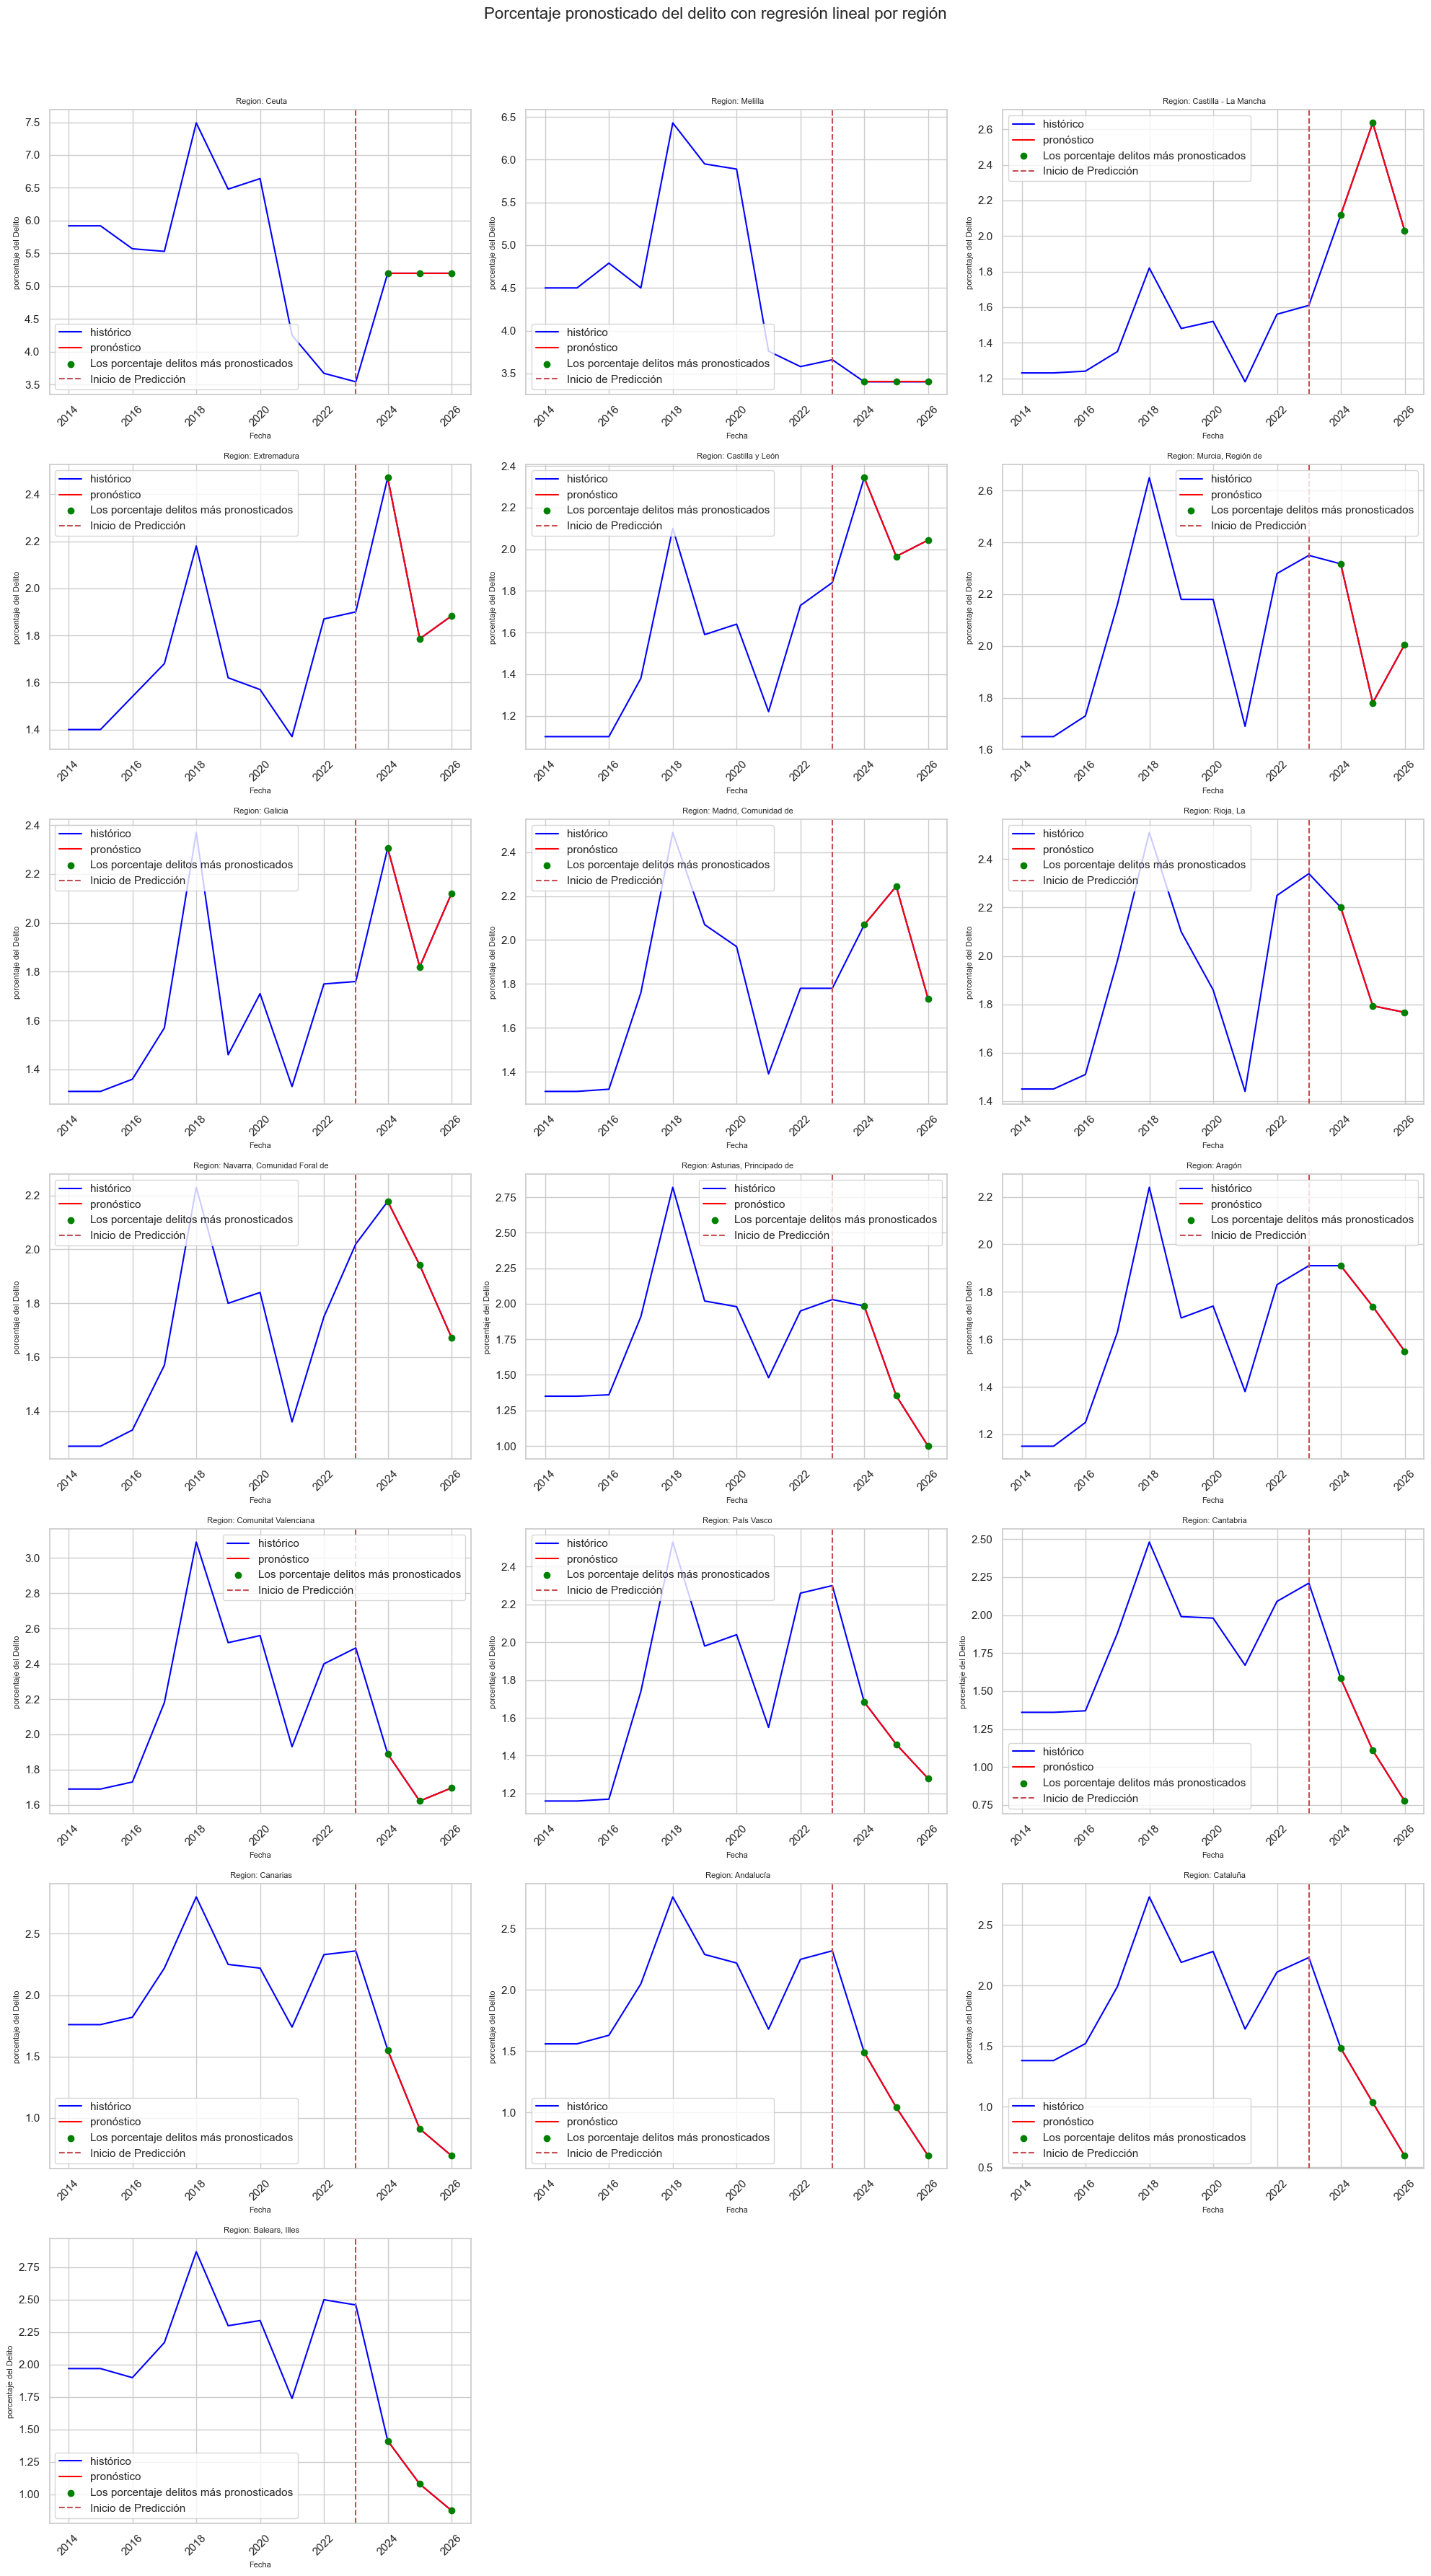

In [104]:
# Calculate grid dimensions
num_combinations = len(top_19_combinations)
num_rows = (num_combinations + 2) // 3  
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  
fig.suptitle('Porcentaje pronosticado del delito con regresión lineal por región', fontsize=16, y=1.02)
axs = axs.flatten()
for i, combination in enumerate(top_19_combinations):
    region = combination
    df_current = final_pred_df_linreg[ (final_pred_df_linreg['Region'] == region) ]
    latest_date = df_filtered_summ['ds'].max()
    historical_data = df_current
    forecasted_data = df_current[df_current['ds'] > latest_date]
    

    axs[i].plot(historical_data['ds'], historical_data['y'], label='histórico', color='blue')
    axs[i].plot(forecasted_data['ds'], forecasted_data['y'], label='pronóstico', color='red')

    # Highlight top 10 forecasted values in this segment
    top_forecasted = forecasted_data.nlargest(10, 'y')
    axs[i].scatter(top_forecasted['ds'], top_forecasted['y'], color='green', zorder=5, label='Los porcentaje delitos más pronosticados')

    axs[i].set_title(f" Region: {region}", fontsize=8)
    axs[i].set_xlabel('Fecha', fontsize=8)
    axs[i].axvline(x=pd.to_datetime('2023-01-01'), color='r', linestyle='--', label='Inicio de Predicción')
    axs[i].set_ylabel('porcentaje del Delito', fontsize=8)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()
# Turn off axes for any remaining subplots
for j in range(i + 1, num_rows * num_cols):
    axs[j].axis('off')
    
plt.tight_layout()
plt.show()

In [85]:
#Now lets see Sepearate ARIMA model for each region
# Exogeneous variables  are excludued as Maximum Likelihood optimization failed to converge

In [391]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df_seperate_arima = df_filtered_summ

# Preparing the data structure to hold models
models = {}



for region in df_seperate_arima['region_encoded'].unique():
            # Filter the dataset for each combination of 'Type of delito', 'Age', and 'Region'
    df_filt = df_seperate_arima[ (df_seperate_arima['region_encoded'] == region)]
            # Check if there's enough data
    if len(df_filt) > 3:  # Adjust this threshold as needed
        df_filt.index = df_filt['ds']
        df_filt.index.freq = 'Y'
        ts = df_filt['y']
                
                # Try fitting the ARIMA model
        try:
            model = ARIMA(ts, order=(1, 1, 1))  # Adjust order based on your data
            fitted_model = model.fit()

                    # Store the fitted model
            models[region] = fitted_model
        except Exception as e:
            print(f"La adaptación del modelo falló para el Region: {region} con error: {e}")
    else:
        print(f"No hay suficientes datos para el Region: {region}")


In [392]:
df_filtered_summ
    

Region   año  perc_delito  perc_pobreza  Analfabetos  \
2    Andalucía  2013         1.56          33.3         3.78   
34   Andalucía  2014         1.56          33.3         3.78   
51   Andalucía  2015         1.63          35.7         3.53   
66   Andalucía  2016         2.05          35.4         3.20   
86   Andalucía  2017         2.76          31.0         3.10   
..         ...   ...          ...           ...          ...   
98   Rioja, La  2018         2.10          16.6         0.72   
119  Rioja, La  2019         1.86          12.3         0.52   
145  Rioja, La  2020         1.44          15.0         0.50   
153  Rioja, La  2021         2.25          16.1         0.95   
181  Rioja, La  2022         2.34          16.6         1.20   

     Educación_superior  Escuela_Profesional  Licenciado  region_encoded  \
2                 21.78                 7.25       11.65               0   
34                21.78                 7.25       11.65               0   
51                22.45                 7.30       12.05               0   
66                23.18                 7.52       11.88               0   
86                23.55                 7.28       12.02               0   
..                  ...                  ...         ...             ...   
98                29.00                 8.72       13.10              18   
119               30.12                 8.48       13.20              18   
145               30.67                 9.12       13.15              18   
153               31.65                 9.55       13.23              18   
181               33.02                 9.82       13.77              18   

            ds     y  y_lag1  y_lag2  y_lag3  
2   2013-12-31  1.56    1.56    1.56    1.56  
34  2014-12-31  1.56    1.56    1.56    1.56  
51  2015-12-31  1.63    1.56    1.56    1.56  
66  2016-12-31  2.05    1.63    1.56    1.56  
86  2017-12-31  2.76    2.05    1.63    1.56  
..         ...   ...     ...     ...     ...  
98  2018-12-31  2.10    2.51    1.98    1.51  
119 2019-12-31  1.86    2.10    2.51    1.98  
145 2020-12-31  1.44    1.86    2.10    2.51  
153 2021-12-31  2.25    1.44    1.86    2.10  
181 2022-12-31  2.34    2.25    1.44    1.86  

[190 rows x 14 columns]

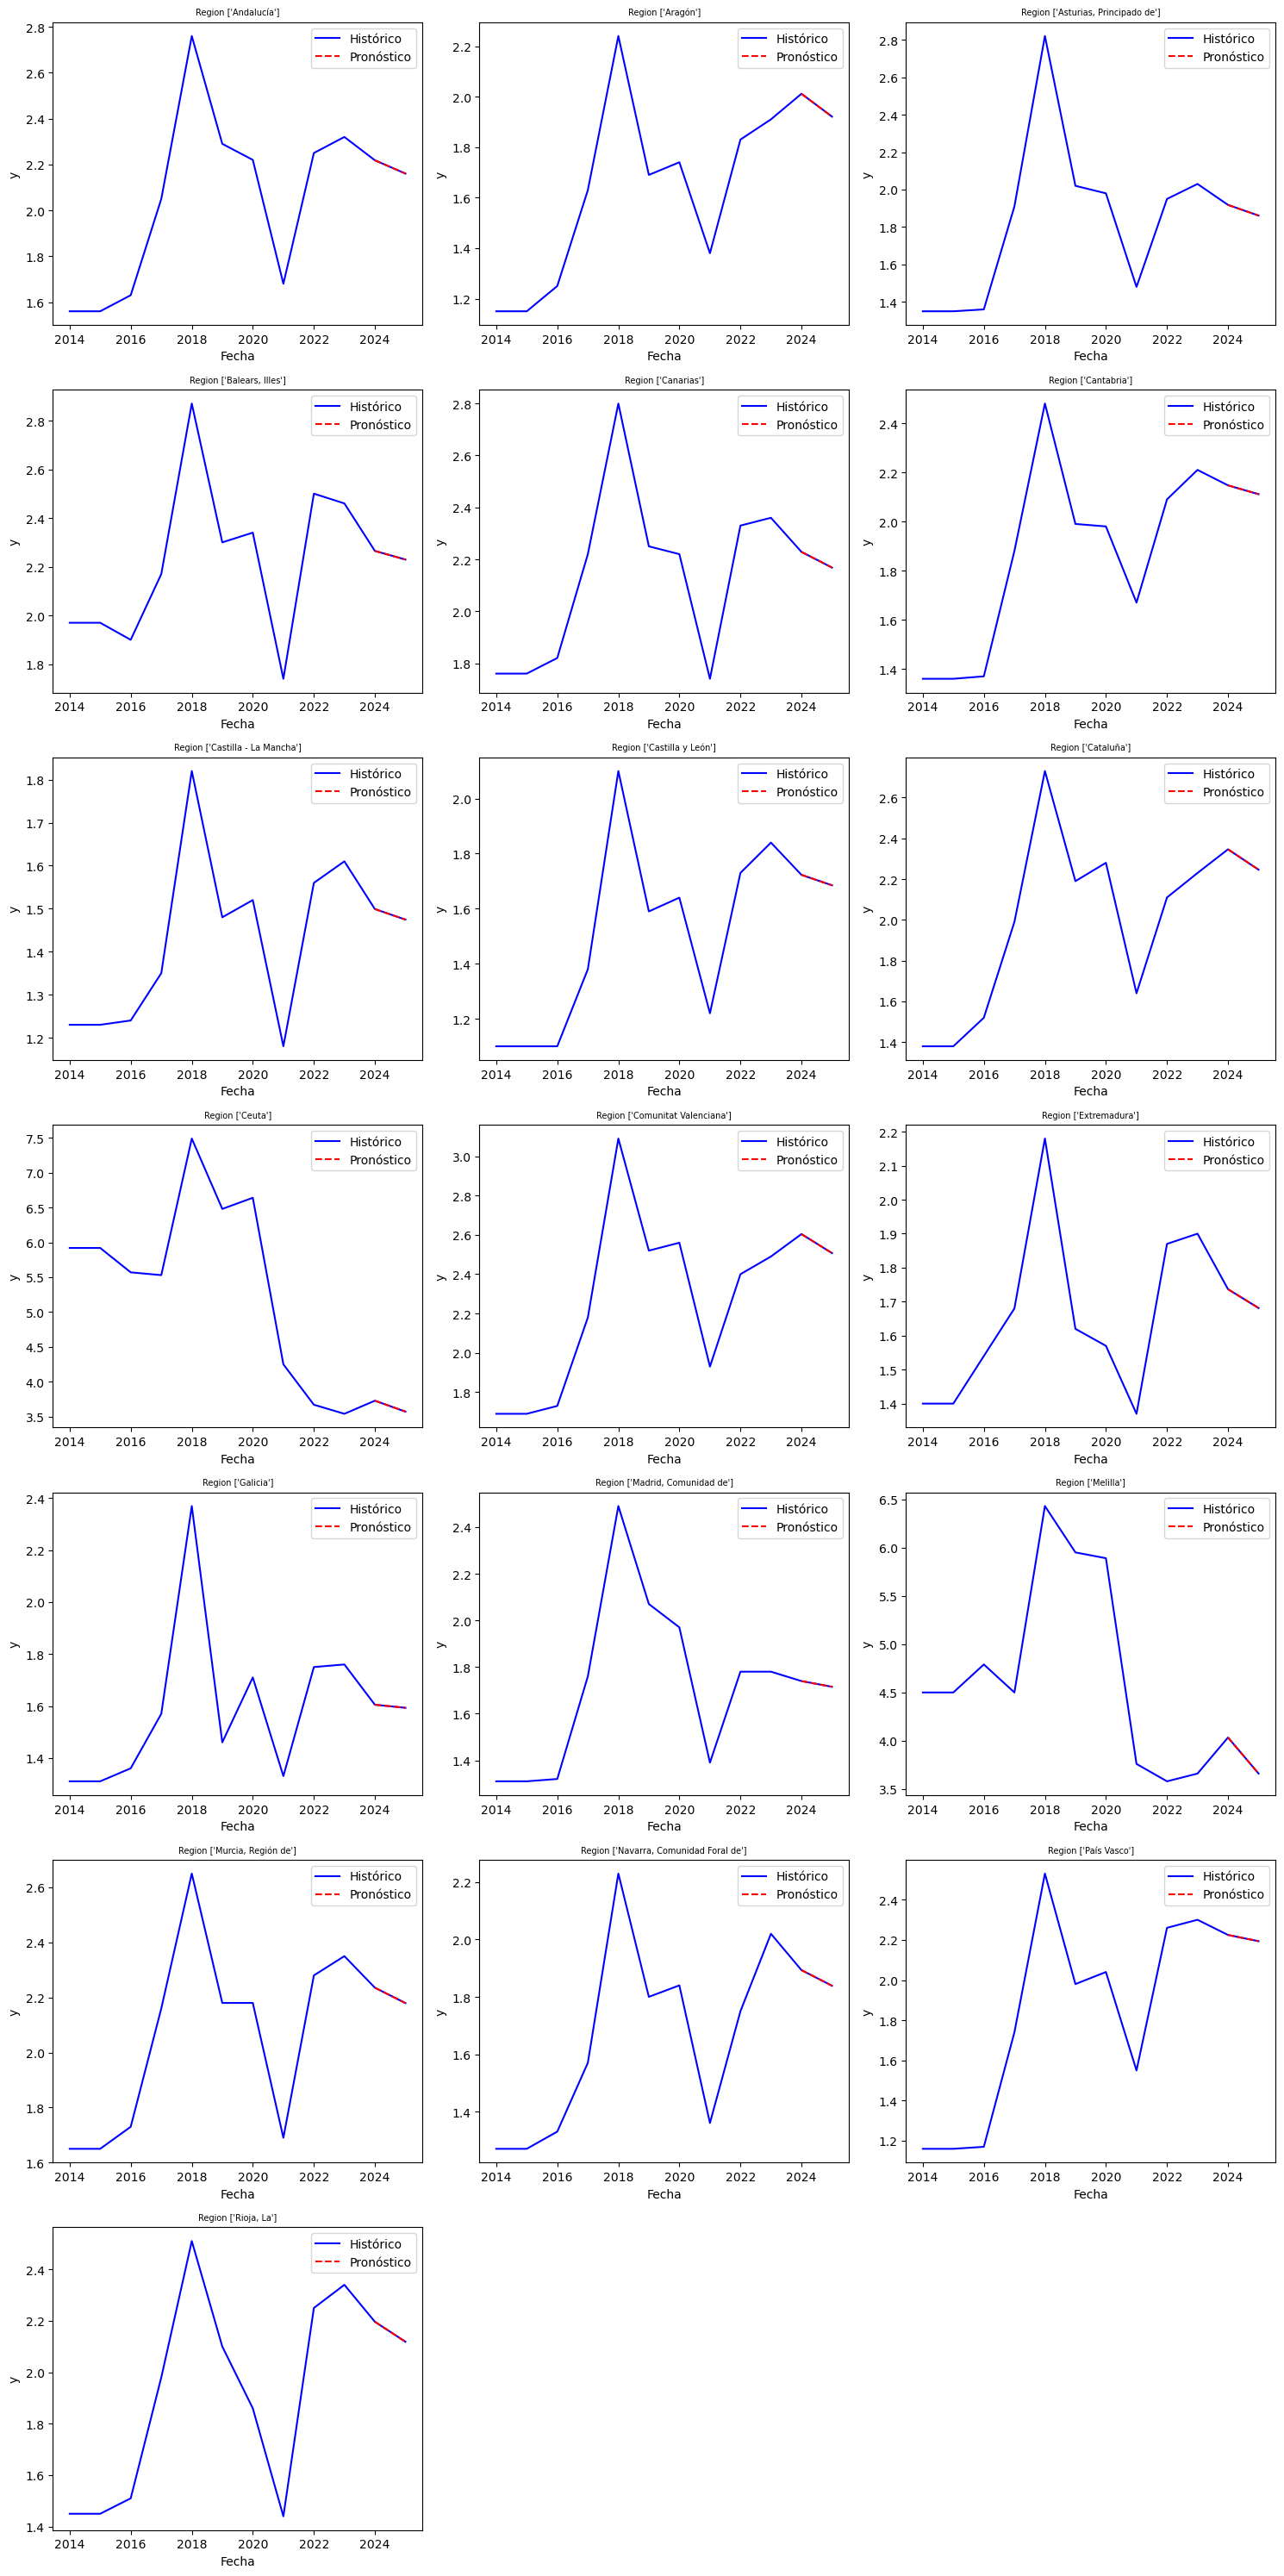

In [397]:

import numpy as np
from datetime import datetime, timedelta

pronóstico_end = pd.to_datetime('2024-12-31')


combined_data = {}

for region in models:
            # Select the relevant historical data
    historical_data = df_seperate_arima[ (df_seperate_arima['region_encoded'] == region)
            ]
    historical_data = historical_data.sort_values(by='ds', ascending=True)
            
            # Forecast
    last_date = historical_data['ds'].max()
    steps = (pronóstico_end.year - last_date.year) 
    forecast = models[region].forecast(steps=steps)
            
    forecast_dates = pd.date_range(start=last_date +  timedelta(days=365), periods=len(forecast), freq='A')
    forecast_df = pd.DataFrame({
                'ds': forecast_dates, 
                'y': forecast, 
                'region_encoded': region
            })
            
            # Combine historical and forecast data
    combined_df = pd.concat([historical_data, forecast_df], ignore_index=True)
    combined_data[region] = combined_df

plot_limit = 21
plot_count = 0

# Determine the layout of subplots
nrows = 7 
ncols = 3  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))  # Adjust the figsize as needed
fig.tight_layout(pad=6.0)


for region in combined_data:
    if plot_count >= plot_limit: break
            
    ax = axes[plot_count // ncols, plot_count % ncols]
    combined_df = combined_data[region]
            
            # Plot historical data
    ax.plot(combined_df['ds'], combined_df['y'], label='Histórico', color='blue')
            
    forecast_df = combined_df[combined_df['ds'] > last_date]
    ax.plot(forecast_df['ds'], forecast_df['y'], label='Pronóstico', color='red', linestyle='--')
    ax.set_title(f"Region {loaded_region_encoder.inverse_transform([region])}",fontsize=7)
    ax.set_xlabel('Fecha')
    ax.set_ylabel('y')
    ax.legend(loc='best')
            
    plot_count += 1

# Adjust unused subplots
for i in range(plot_count, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()